# Wine rating and price: patterns, trends, and insights.
*Exploratory Data Analysis for Machine Learning (part of IBM Machine Learning Profession Certificate) - Course Project.*

>*Beer is made by men, wine by God.*  
**― Martin Luther**, circa 1500s

<img src="https://c1.staticflickr.com/5/4124/5096953439_5a41df8055_b.jpg" />

## Table of contents
1. [Introduction](#introduction)  
  1.1. [Scope of the project](#scope)  
  1.2. [Data Collection](#collection)  
  1.3. [Data Understanding](#understanding)  
2. [Data Exploration](#exploration)  
  2.1. [Initial Plan](#initial)  
  2.2. [Data Cleaning](#cleaning)  
  2.3. [EDA - Exploratory Data Analysis](#eda)  
  2.4. [Feature Engineering & Variable Transformations](#featureengineering)  
3. [Hypothesis Testing](#hypothesistesting)
4. [Discussion](#discussion)
5. [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

In [1]:
# Let's import the needed library
import pandas as pd
print('Needed libraries successfully imported.')

Needed libraries successfully imported.


### 1.1. Scope of the project <a name="scope"></a>

In this project we'll analyze data about wine to better understand patterns and trends related to this product category; in particular, we want to find insights and patterns in relation to:
* Wine rating
* Wine price.  

We'll adopt a **descriptive analytic approach**, to unlock potential insights and hidden correlations between data attributes.  

For the scope of this analysis, I'll use datasets from <a href=https://www.kaggle.com/>Kaggle.com</a>, containing 4 files for each wine type: red, white, rose, and sparkling.  
**Source of data: <a href=https://www.vivino.com/>Vivino.com</a>.**  

Let's have a first look at the datasets.

In [2]:
# Let's have a look at the data
red = pd.read_csv(r'C:\Users\HP\Desktop\COURSERA\IBM Machine Learning Professional Certificate\01_Exploratory Data Analysis for Machine Learning\PROJECT\Wine rating\Red.csv')
red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [3]:
white=pd.read_csv(r'C:\Users\HP\Desktop\COURSERA\IBM Machine Learning Professional Certificate\01_Exploratory Data Analysis for Machine Learning\PROJECT\Wine rating\White.csv')
white.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018


In [4]:
rose=pd.read_csv(r'C:\Users\HP\Desktop\COURSERA\IBM Machine Learning Professional Certificate\01_Exploratory Data Analysis for Machine Learning\PROJECT\Wine rating\Rose.csv')
rose.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018


In [5]:
sparkling=pd.read_csv(r'C:\Users\HP\Desktop\COURSERA\IBM Machine Learning Professional Certificate\01_Exploratory Data Analysis for Machine Learning\PROJECT\Wine rating\Sparkling.csv')
sparkling.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Crémant de Loire Brut 2017,France,Crémant de Loire,Langlois-Chateau,3.9,25,14.41,2017
1,Vicar's Choice Sauvignon Blanc Bubbles 2019,New Zealand,Marlborough,Saint Clair,4.2,25,11.90,2019
2,Crémant de Limoux Brut N.V.,France,Crémant de Limoux,Prima Perla,3.5,25,14.32,N.V.
3,Athesis Brut 2016,Italy,Südtirol - Alto Adige,Kettmeir,4.0,25,21.50,2016
4,Blanc de Blancs Réserve Brut Nature N.V.,Germany,Pfalz,Eymann,3.9,25,31.18,N.V.


Each dataset contains the same number and type of attributes 

### 1.2. Data Collection  <a name="collection"></a>

In order to have a useful dataset for our descriptive analysis, I have to concatenate the 4 sets of data into one. Before doing this, I add one additional field ("Style") in each dataset.

In [6]:
red['Style']='red'
red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red


In [7]:
white['Style']='white'
white.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017,white
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010,white
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017,white
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018,white
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018,white


In [8]:
rose['Style']='rose'
rose.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019,rose
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019,rose
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019,rose
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017,rose
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018,rose


In [9]:
sparkling['Style']='sparkling'
sparkling.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
0,Crémant de Loire Brut 2017,France,Crémant de Loire,Langlois-Chateau,3.9,25,14.41,2017,sparkling
1,Vicar's Choice Sauvignon Blanc Bubbles 2019,New Zealand,Marlborough,Saint Clair,4.2,25,11.90,2019,sparkling
2,Crémant de Limoux Brut N.V.,France,Crémant de Limoux,Prima Perla,3.5,25,14.32,N.V.,sparkling
3,Athesis Brut 2016,Italy,Südtirol - Alto Adige,Kettmeir,4.0,25,21.50,2016,sparkling
4,Blanc de Blancs Réserve Brut Nature N.V.,Germany,Pfalz,Eymann,3.9,25,31.18,N.V.,sparkling


In [10]:
wine_data = pd.concat([red,white,rose,sparkling], axis=0, ignore_index=True)
# Let's have a look at the first 5 observations of the dataset
wine_data.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red


In [11]:
# Let's have a look at the last 5 observations of the dataset
wine_data.tail()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,N.V.,sparkling
13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,N.V.,sparkling
13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,N.V.,sparkling
13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,N.V.,sparkling
13833,Brut Champagne N.V.,France,Champagne,Dom Pérignon,4.6,94287,170.00,N.V.,sparkling


In [12]:
#Let's create a copy of the dataset
original_wine_ds = wine_data.copy()
print('Original dataset successfully copied as back-up.')

Original dataset successfully copied as back-up.


We are ready to start our analysis.

### 1.3. Data Understanding  <a name="understanding"></a>

Let's start with analyzing the size of our datasets and the data types.

In [13]:
print('Our wine dataset contains {} observations with {} attributes.'.format(wine_data.shape[0], wine_data.shape[1]))

Our wine dataset contains 13834 observations with 9 attributes.


In [14]:
wine_data.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
Style               object
dtype: object

In [15]:
wine_data.columns

Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year', 'Style'],
      dtype='object')

Let's check the number of categories/classes per object-type attribute.

In [16]:
# Let's define a function to count the number of categories in the object-type attributes
def category_count(attribute):
    print('"{}" attribute - number of categories: {}'.format(attribute, wine_data[attribute].nunique()))
          
category_count('Name')
category_count('Country')
category_count('Region')
category_count('Winery')
category_count('Year')
category_count('Style')

"Name" attribute - number of categories: 10934
"Country" attribute - number of categories: 33
"Region" attribute - number of categories: 861
"Winery" attribute - number of categories: 3505
"Year" attribute - number of categories: 34
"Style" attribute - number of categories: 4


Let's check the data range per each numeric-type attribute.

In [17]:
def attribute_range(attribute):
    print('"{}" attribute range: {} - {}'.format(attribute, min(wine_data[attribute]), max(wine_data[attribute])))
          
attribute_range('Rating')
attribute_range('NumberOfRatings')
attribute_range('Price')

"Rating" attribute range: 2.2 - 4.9
"NumberOfRatings" attribute range: 25 - 94287
"Price" attribute range: 3.15 - 3410.79


The wine dataset contains **13,834 observations with 9 attributes: 6 object-types and 3 numeric-types, either floats or integers.**  
Attributes and data types are as follows:
* "Name": Name of wine. Data type: object (text). 10,934 categories (some observations share the same name).
* "Country": Origin country of wine. Data type: object (text). 33 categories.
* "Region": Origin region or province of wine. Data type: object (text). 861 categories.
* "Winery": Origin winery. Data type: object (text). 3,505 categories.
* "Rating": Average rating. Data type: float. Range: 2.2 - 4.9.
* "NumberOfRatings": Number of people who rated this wine. Data type: integer. Range: 25 - 94,287 reviews.
* "Price": Price in EUR currency. Data type: float. Range: 3.15 - 3,410.79 euro.
* "Year": Year of production. Data type: object (text). 34 categories.
* "Style": Style of wine. Data type: object (text). 4 categories.

## 2. Data Exploration  <a name="exploration"></a>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
print('Needed libraries successfully imported.')

Needed libraries successfully imported.


### 2.1. Inital Plan for Data Exploration  <a name="initial"></a>

1. Data Cleaning: missing values, duplicates, outliers, other inconsistent data.
2. Exploratory Data Analysis (EDA).
3. Data Preparation: Feature Engineering and Variable Transformation.

### 2.2. Data Cleaning  <a name="cleaning"></a>

#### 2.2.1. Missing Data

In [19]:
# Let's check for missing data in our data set
missing_data = wine_data.isnull()

for attribute in missing_data.columns.tolist():
    print(attribute)
    print(missing_data[attribute].value_counts())
    print('')

Name
False    13834
Name: Name, dtype: int64

Country
False    13834
Name: Country, dtype: int64

Region
False    13834
Name: Region, dtype: int64

Winery
False    13834
Name: Winery, dtype: int64

Rating
False    13834
Name: Rating, dtype: int64

NumberOfRatings
False    13834
Name: NumberOfRatings, dtype: int64

Price
False    13834
Name: Price, dtype: int64

Year
False    13834
Name: Year, dtype: int64

Style
False    13834
Name: Style, dtype: int64



There are no missing data in the dataset.

#### 2.2.2. Duplicates

In [20]:
# Let's check for duplicates in the data set
print('Number of duplicates in the dataset:', wine_data.duplicated().sum())

Number of duplicates in the dataset: 0


There are no duplicates in tha dataset, but we have already noticed that some wines share the same name. So let's have a look at the "Name" duplicates.

In [21]:
wine_data[wine_data['Name'].duplicated(keep=False)].sort_values(by='Name')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
12350,Albariño 2018,Spain,Rías Baixas,Lagar de Cervera,3.9,930,14.38,2018,white
12231,Albariño 2018,Spain,Rías Baixas,Fillaboa,4.0,564,13.16,2018,white
12124,Albariño 2018,Spain,Rías Baixas,Pazo Barrantes,3.8,442,15.50,2018,white
9627,Albariño 2018,Spain,Rías Baixas,Los Amantes,3.7,43,7.00,2018,white
8968,Albariño 2019,Spain,Rías Baixas,Pazo Señorans,4.1,30,11.95,2019,white
...,...,...,...,...,...,...,...,...,...
3798,Zweigelt Reserve 2017,Austria,Thermenregion,Weingut Krug,3.6,30,14.60,2017,red
9367,Ürziger Würzgarten Riesling Auslese 2015,Germany,Mosel,Karl Erbes,4.0,38,16.00,2015,white
9217,Ürziger Würzgarten Riesling Auslese 2015,Germany,Mosel,Markus Molitor,4.5,35,99.95,2015,white
11435,Ürziger Würzgarten Riesling Kabinett 2016,Germany,Mosel,Markus Molitor,3.9,165,15.40,2016,white


It seems that different observations with the same name can have same "Country", "Region", and "Year" values, but being produced by a different Winery. Let's create a new attribute, "Unique Name", merging the "Name" and "Winery" attribute, and then let's check for duplicates in the attribute.

In [22]:
wine_data['Unique_Name'] = wine_data['Name'] + ' - ' + wine_data['Winery']
wine_data.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red,Pomerol 2011 - Château La Providence
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red,Lirac 2017 - Château Mont-Redon
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red,Erta e China Rosso di Toscana 2015 - Renzo Masi
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red,Bardolino 2019 - Cavalchina
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red,Ried Scheibner Pinot Noir 2016 - Markowitsch


In [23]:
print('Number of "Unique_name" duplicates:',wine_data['Unique_Name'].duplicated().sum())

Number of "Unique_name" duplicates: 4


In [24]:
# Let's have a look at the observations with the same Unique Name
wine_data[wine_data['Unique_Name'].duplicated(keep=False)].sort_values(by='Unique_Name')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
2574,Cabernet Sauvignon 2016,United States,Napa Valley,Louis M. Martini,4.1,2216,30.43,2016,red,Cabernet Sauvignon 2016 - Louis M. Martini
3552,Cabernet Sauvignon 2016,United States,Sonoma County,Louis M. Martini,3.8,2882,17.79,2016,red,Cabernet Sauvignon 2016 - Louis M. Martini
8335,Grande Cuvée 2017,Austria,Burgenland,Salzl Seewinkelhof,3.9,91,14.35,2017,red,Grande Cuvée 2017 - Salzl Seewinkelhof
8348,Grande Cuvée 2017,Austria,Burgenland,Salzl Seewinkelhof,3.9,91,17.29,2017,red,Grande Cuvée 2017 - Salzl Seewinkelhof
12305,Mâcon-Villages 2018,France,Mâcon-Villages,Joseph Drouhin,3.8,731,11.40,2018,white,Mâcon-Villages 2018 - Joseph Drouhin
12306,Mâcon-Villages 2018,France,Mâcon-Villages,Joseph Drouhin,3.8,731,13.60,2018,white,Mâcon-Villages 2018 - Joseph Drouhin
1801,Old Vine Zinfandel 2016,United States,Lodi,Ravenswood,3.8,1711,15.49,2016,red,Old Vine Zinfandel 2016 - Ravenswood
5890,Old Vine Zinfandel 2016,United States,Sonoma County,Ravenswood,4.0,49,25.99,2016,red,Old Vine Zinfandel 2016 - Ravenswood


2 of the duplicates are made in different regions, and they have different Rating and Number of Ratings; they are not really duplicates. I add the "Region" value to the "Unique_name" attribute.  

The other 2 duplicates have the same values in all attributes, but Price. So it seems that these observations are actually duplicates: price may have changed over time, or it's just a mistake in the dataset. After checking the Data Source (<a href = https://www.vivino.com/>vivino.com</a>), I only keep the observations matching the current price on the website.

In [25]:
wine_data['Unique_Name'] = wine_data['Winery'] + ' - ' + wine_data['Name'] + ' - ' + wine_data['Region']
wine_data.drop(wine_data[wine_data.index == 8335].index, axis=0, inplace=True)
wine_data.drop(wine_data[wine_data.index == 12305].index, axis=0, inplace=True)
wine_data.reset_index(drop=True, inplace=True)
wine_data.shape

(13832, 10)

In [26]:
wine_data.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red,Château La Providence - Pomerol 2011 - Pomerol
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red,Château Mont-Redon - Lirac 2017 - Lirac
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red,Renzo Masi - Erta e China Rosso di Toscana 201...
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red,Cavalchina - Bardolino 2019 - Bardolino
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red,Markowitsch - Ried Scheibner Pinot Noir 2016 -...


In [27]:
wine_data.tail()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
13827,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,N.V.,sparkling,Bollinger - Special Cuvée Brut Aÿ Champagne N....
13828,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,N.V.,sparkling,Louis Roederer - Brut Premier Champagne N.V. -...
13829,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,N.V.,sparkling,Moët & Chandon - Impérial Brut Champagne N.V. ...
13830,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,N.V.,sparkling,Veuve Clicquot - Brut (Carte Jaune) Champagne ...
13831,Brut Champagne N.V.,France,Champagne,Dom Pérignon,4.6,94287,170.00,N.V.,sparkling,Dom Pérignon - Brut Champagne N.V. - Champagne


We dropped the duplicated observations in the dataset. **The wine dataset, now, has 13,832 observations**. 

#### 2.2.3. Outliers

Let's check for outliers in the numeric data type columns.

In [28]:
print('Numeric data-type attributes:', wine_data.select_dtypes('number').columns[0], ',',\
      wine_data.select_dtypes('number').columns[1], ',', wine_data.select_dtypes('number').columns[2])

Numeric data-type attributes: Rating , NumberOfRatings , Price


##### Rating

<function matplotlib.pyplot.show(*args, **kw)>

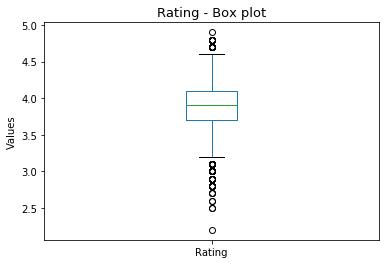

In [29]:
# Let's detect outliers with box plot
wine_data['Rating'].plot(kind='box')
plt.title('Rating - Box plot', fontsize=13)
plt.ylabel('Values', fontsize=10)
plt.show

It does seem we have some outliers in the attribute. Let's find them.

In [30]:
# Detecting outliers with statistical methods: Interquartile Range
# Let's create a function for detecting outliers with the Interquartile Range

def outlier_region(attribute):
    min, q25, q50, q75, max = np.percentile(wine_data[attribute], [0,25,50,75,100])
    iqr = q75 - q25
    min_limit = q25 - 1.5 * iqr
    max_limit = q75 + 1.5 * iqr
    print('"{}" attribute range: {} - {}'.format(attribute, min, max))
    print('"{}" non-outlier region: {} - {}.' .format(attribute, min_limit, max_limit))
    
outlier_region('Rating')

"Rating" attribute range: 2.2 - 4.9
"Rating" non-outlier region: 3.100000000000001 - 4.699999999999999.


Let's create a density plot to visualize the data distribution.

<function matplotlib.pyplot.show(*args, **kw)>

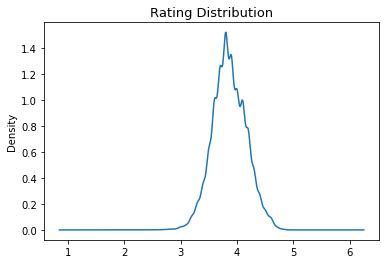

In [31]:
wine_data['Rating'].plot(kind='kde')
plt.title('Rating Distribution', fontsize=13)
plt.ylabel('Density', fontsize=10)
plt.show

Data has (almost) a normal distribution. Let's create a list with the outliers.

In [32]:
# Let's create a list with the outliers using a function
def outlier_detector(attribute):
    min, q25, q50, q75, max = np.percentile(wine_data[attribute], [0,25,50,75,100])
    iqr = q75 - q25
    min_limit = q25 - 1.5 * iqr
    max_limit = q75 + 1.5 * iqr
    
    global outliers_list
    outliers_list=[]
    for x in wine_data[attribute]:
        if x < min_limit:
            outliers_list.append(x)
        elif x > max_limit:
            outliers_list.append(x)
    
    print('Numbers of outliers in "{}" attribute: {}'.format(attribute, len(outliers_list)))
    print('Percentage of "{}" outliers: {}%.'.format(attribute, round(len(outliers_list)/wine_data.shape[0]*100),2))
    print('')
    print('First 10 "{}" outliers:'.format(attribute))
    print(outliers_list[0:10])
    
outlier_detector('Rating')

Numbers of outliers in "Rating" attribute: 144
Percentage of "Rating" outliers: 1%.

First 10 "Rating" outliers:
[2.9, 4.7, 3.1, 3.0, 3.1, 3.1, 4.7, 4.7, 4.8, 3.0]


Let's have a look at some observations with a Rating score considered as outlier (Interquartile Range method). 

In [33]:
rating_outliers = outliers_list
wine_data[wine_data['Rating'].isin(rating_outliers)]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
23,Virtus Tannat 2013,Brazil,Serra Gaúcha,Monte Paschoal,2.9,100,6.77,2013,red,Monte Paschoal - Virtus Tannat 2013 - Serra Ga...
253,Promontory 2013,United States,Napa Valley,Promontory,4.7,107,721.34,2013,red,Promontory - Promontory 2013 - Napa Valley
607,Tribu Merlot 2016,Argentina,Maipu,Trivento,3.1,119,8.67,2016,red,Trivento - Tribu Merlot 2016 - Maipu
632,Cabernet Sauvignon - Merlot 2015,Slovenia,Podravje,Puklavec Family Wines,3.0,120,7.65,2015,red,Puklavec Family Wines - Cabernet Sauvignon - M...
655,Sorì dei Mori Barbera d'Asti 2018,Italy,Barbera d'Asti,Vinchio - Vaglio Serra,3.1,121,8.90,2018,red,Vinchio - Vaglio Serra - Sorì dei Mori Barbera...
...,...,...,...,...,...,...,...,...,...,...
12505,Garrus Rosé 2018,France,Côtes de Provence,Château d'Esclans,4.8,36,109.00,2018,rose,Château d'Esclans - Garrus Rosé 2018 - Côtes d...
12599,Rioja Tempranillo Rosado 2018,Spain,Rioja,Antaño,3.1,59,4.25,2018,rose,Antaño - Rioja Tempranillo Rosado 2018 - Rioja
12718,Garnacha Rosado 2018,Spain,Navarra,Homenaje,3.1,159,5.23,2018,rose,Homenaje - Garnacha Rosado 2018 - Navarra
12912,Cristal Rosé Brut Champagne (Millésimé) 2012,France,Champagne,Louis Roederer,4.7,39,449.90,2012,sparkling,Louis Roederer - Cristal Rosé Brut Champagne (...


**The "Rating" outliers seem to be a normal part of the data distribution due to its natural variation.**  

I keep these outliers in the data set. 

##### Number Of Ratings

<function matplotlib.pyplot.show(*args, **kw)>

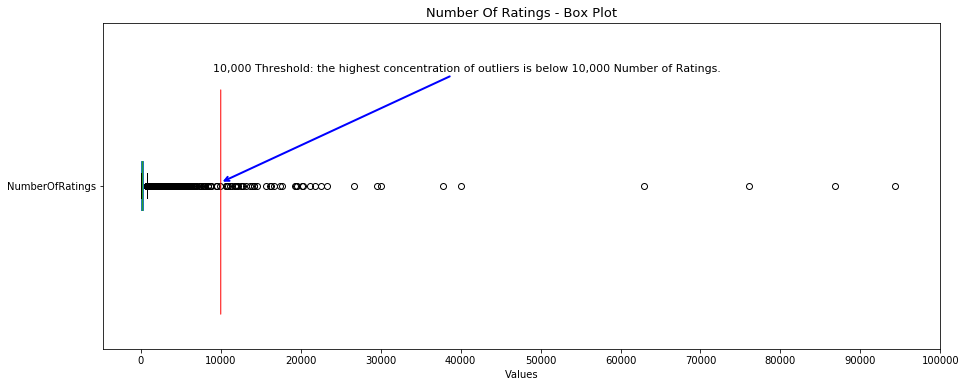

In [34]:
# Let's detect outliers with box plot
wine_data['NumberOfRatings'].plot(kind='box', figsize=(15,6), vert=False)
plt.title('Number Of Ratings - Box Plot', fontsize=13)
plt.xticks(range(0,100001,10000))
plt.xlabel('Values', fontsize=10)
plt.annotate('10,000 Threshold: the highest concentration of outliers is below 10,000 Number of Ratings.',
             fontsize = 11,
             xy=(10000,1.01),
             xytext=(9000,1.35),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.annotate('',
             xy=(10000,0.6),
             xytext=(10000,1.3),
             xycoords='data',
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=1))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

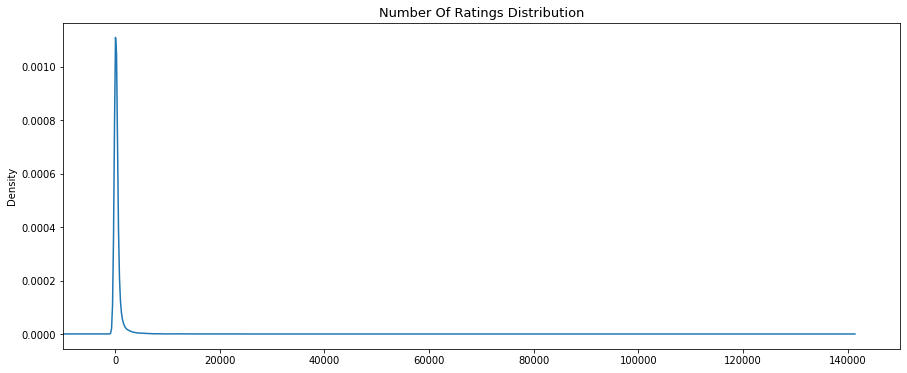

In [35]:
# Let's check the data distribution with a density plot
wine_data['NumberOfRatings'].plot(kind='kde', figsize=(15,6))
plt.title('Number Of Ratings Distribution', fontsize=13)
plt.xlim(-10000, 150000)
plt.show

The data distribution appears to be very skewed to the right, with several outliers beyond the max limit of the Interquartile range. The highest concentration of outliers is below the 10,000 number-of-reviews threshold.

In [36]:
outlier_region('NumberOfRatings')
print('')
outlier_detector('NumberOfRatings')

"NumberOfRatings" attribute range: 25.0 - 94287.0
"NumberOfRatings" non-outlier region: -364.0 - 756.0.

Numbers of outliers in "NumberOfRatings" attribute: 1544
Percentage of "NumberOfRatings" outliers: 11%.

First 10 "NumberOfRatings" outliers:
[1000, 1000, 1000, 1001, 1001, 1004, 1006, 1008, 1009, 1010]


Let's have a look at some observations with a Number of Ratings considered an outlier.

In [37]:
numberofratings_outliers = outliers_list
wine_data[wine_data['NumberOfRatings'].isin(numberofratings_outliers)]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
25,Badia a Passignano Gran Selezione Chianti Clas...,Italy,Chianti Classico,Antinori,4.2,1000,39.90,2016,red,Antinori - Badia a Passignano Gran Selezione C...
26,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,France,Saint-Émilion Grand Cru,Château Figeac,4.4,1000,174.49,2012,red,Château Figeac - Saint-Émilion Grand Cru (Prem...
27,Carlo V Il Rosso dell'Imperatore 2013,Italy,Veneto,Colli Vicentini,3.7,1000,15.90,2013,red,Colli Vicentini - Carlo V Il Rosso dell'Impera...
28,Pinot Noir 2016,United States,Monterey,District 7,3.6,1001,15.98,2016,red,District 7 - Pinot Noir 2016 - Monterey
29,Marquis de Calon Saint-Estèphe 2015,France,Saint-Estèphe,Château Calon-Ségur,3.9,1001,43.28,2015,red,Château Calon-Ségur - Marquis de Calon Saint-E...
...,...,...,...,...,...,...,...,...,...,...
13827,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,N.V.,sparkling,Bollinger - Special Cuvée Brut Aÿ Champagne N....
13828,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,N.V.,sparkling,Louis Roederer - Brut Premier Champagne N.V. -...
13829,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,N.V.,sparkling,Moët & Chandon - Impérial Brut Champagne N.V. ...
13830,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,N.V.,sparkling,Veuve Clicquot - Brut (Carte Jaune) Champagne ...


In [38]:
# Let's check the extreme outliers (number of ratings > 10,000)
wine_data[wine_data['NumberOfRatings'] > 10000].sort_values(by='NumberOfRatings', ascending=False)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
13831,Brut Champagne N.V.,France,Champagne,Dom Pérignon,4.6,94287,170.00,N.V.,sparkling,Dom Pérignon - Brut Champagne N.V. - Champagne
13830,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,N.V.,sparkling,Veuve Clicquot - Brut (Carte Jaune) Champagne ...
13829,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,N.V.,sparkling,Moët & Chandon - Impérial Brut Champagne N.V. ...
12427,Vinho Verde Branco N.V.,Portugal,Vinho Verde,Casal Garcia,3.7,62980,4.35,N.V.,white,Casal Garcia - Vinho Verde Branco N.V. - Vinho...
13828,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,N.V.,sparkling,Louis Roederer - Brut Premier Champagne N.V. -...
13827,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,N.V.,sparkling,Bollinger - Special Cuvée Brut Aÿ Champagne N....
13826,Brut (Réserve) Champagne N.V.,France,Champagne,Taittinger,4.1,30090,35.90,N.V.,sparkling,Taittinger - Brut (Réserve) Champagne N.V. - C...
12824,The Original Rosé N.V.,Portugal,Douro,Mateus,3.6,29531,5.99,N.V.,rose,Mateus - The Original Rosé N.V. - Douro
13825,Grand Brut Champagne N.V.,France,Champagne Grand Cru,Perrier-Jouët,4.1,26726,43.69,N.V.,sparkling,Perrier-Jouët - Grand Brut Champagne N.V. - Ch...
13824,Brut Cuvée Champagne Rosé N.V.,France,Champagne,Laurent-Perrier,4.3,23316,69.00,N.V.,sparkling,Laurent-Perrier - Brut Cuvée Champagne Rosé N....


In [39]:
print('Number of extreme outliers (> 10,000 Number of Ratings):', len(wine_data[wine_data['NumberOfRatings'] > 10000]))
print('Percentage of extreme outliers (> 10,000 Number of Ratings): {}%'.format(\
      round(len(wine_data[wine_data['NumberOfRatings'] > 10000])/wine_data.shape[0]*100,2)))

Number of extreme outliers (> 10,000 Number of Ratings): 44
Percentage of extreme outliers (> 10,000 Number of Ratings): 0.32%


The number of outliers, detected using the Interquartile Range method, is quite high: 11% of all observations. However, the number of extreme outliers (wines which have got more than 10,000 ratings) is negligible: 44 entries, that is 0.32% of all data set.  

As observed, the data distribution is right-skewed: all outliers are beyond the upper maximum limit. The wines with the highest number of ratings (the extreme outliers) are very popular wines produced by highly renowned wineries such as Dom Perignon, Veuve Clicquot, Moet & Chandon, Bollinger, Ferrari... it makes sense that very popular and renowned wines get a higher number of reviews compared to others. Therefore, **these outliers don't seem to be mistakes or aberrations, but a normal part of the data distribution due to its natural variation.**  

I keep these outliers in the dataset.

##### Price

<function matplotlib.pyplot.show(*args, **kw)>

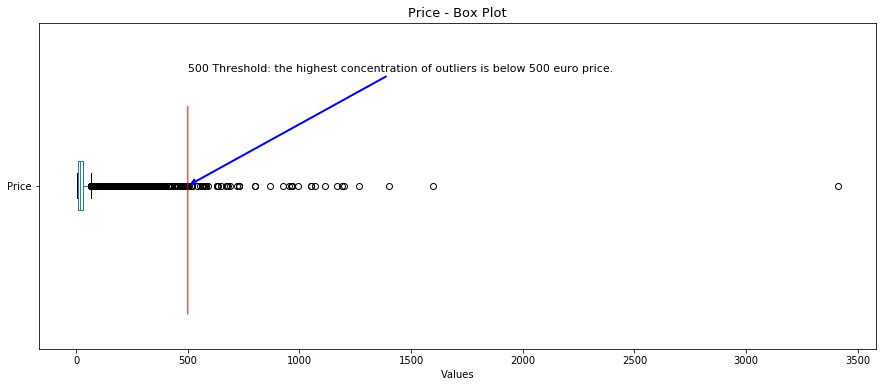

In [40]:
# Let's detect outliers with box plot
wine_data['Price'].plot(kind='box', vert=False, figsize=(15,6))
plt.title('Price - Box Plot', fontsize=13)
plt.xticks(range(0,3501,500))
plt.xlabel('Values', fontsize=10)
plt.annotate('500 Threshold: the highest concentration of outliers is below 500 euro price.',
             fontsize=11,
             xy=(500,1),
             xytext=(500,1.35),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.annotate('',
             xy=(500,0.6),
             xytext=(500,1.25),
             xycoords='data',
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=1))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

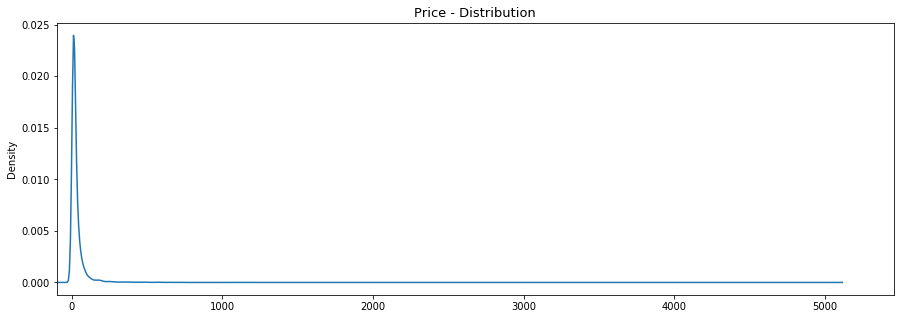

In [41]:
# Let's check the data distribution with a density plot
wine_data['Price'].plot(kind='kde', figsize=(15,5))
plt.title('Price - Distribution', fontsize=13)
plt.xlim(-100,)
plt.show

Again, the attribute data distribution appears to be very skewed to the right, with several outliers beyond the max limit of the Interquartile range.  
The most expensive bottle is almost 3,500 Euros: this is an extreme outlier far away from all other observations. The highest concentration of outliers is below the 500 euro price threshold.

In [42]:
outlier_region('Price')
print('')
outlier_detector('Price')

"Price" attribute range: 3.15 - 3410.79
"Price" non-outlier region: -24.000000000000007 - 66.4.

Numbers of outliers in "Price" attribute: 1313
Percentage of "Price" outliers: 9%.

First 10 "Price" outliers:
[95.0, 140.64, 174.49, 189.0, 76.9, 633.62, 119.0, 229.0, 240.0, 193.02]


Let's have a look at some observations whose Price attribute is classified as an outlier.

In [43]:
price_outliers = outliers_list
wine_data[wine_data['Price'].isin(price_outliers)]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red,Château La Providence - Pomerol 2011 - Pomerol
11,Descendant 2016,Australia,Barossa,Torbreck,4.3,100,140.64,2016,red,Torbreck - Descendant 2016 - Barossa
26,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,France,Saint-Émilion Grand Cru,Château Figeac,4.4,1000,174.49,2012,red,Château Figeac - Saint-Émilion Grand Cru (Prem...
32,Saint-Julien (Grand Cru Classé) 2010,France,Saint-Julien,Château Léoville Poyferré,4.4,1008,189.00,2010,red,Château Léoville Poyferré - Saint-Julien (Gran...
34,Vigna del Noce Barbera d'Asti 2007,Italy,Barbera d'Asti,Trinchero,4.1,101,76.90,2007,red,Trinchero - Vigna del Noce Barbera d'Asti 2007...
...,...,...,...,...,...,...,...,...,...,...
13798,Brut Champagne 2008,France,Champagne,Dom Pérignon,4.6,8349,170.59,2008,sparkling,Dom Pérignon - Brut Champagne 2008 - Champagne
13807,Belle Epoque Brut Champagne N.V.,France,Champagne,Perrier-Jouët,4.5,12146,152.39,N.V.,sparkling,Perrier-Jouët - Belle Epoque Brut Champagne N....
13815,Grande Cuvée Brut Champagne N.V.,France,Champagne,Krug,4.6,16160,189.00,N.V.,sparkling,Krug - Grande Cuvée Brut Champagne N.V. - Cham...
13824,Brut Cuvée Champagne Rosé N.V.,France,Champagne,Laurent-Perrier,4.3,23316,69.00,N.V.,sparkling,Laurent-Perrier - Brut Cuvée Champagne Rosé N....


In [44]:
# Let's check the extreme outliers (Price > 500 euros)
wine_data[wine_data['Price'] > 500].sort_values(by='Price', ascending=False)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
2344,Pomerol 2012,France,Pomerol,Pétrus,4.7,204,3410.79,2012,red,Pétrus - Pomerol 2012 - Pomerol
7466,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,France,Saint-Émilion Grand Cru,Château Ausone,4.5,72,1599.95,2010,red,Château Ausone - Saint-Émilion Grand Cru (Prem...
5560,Pauillac (Premier Grand Cru Classé) 2010,France,Pauillac,Château Lafite Rothschild,4.4,457,1399.00,2010,red,Château Lafite Rothschild - Pauillac (Premier ...
4395,Pauillac (Premier Grand Cru Classé) 1992,France,Pauillac,Château Lafite Rothschild,4.5,346,1266.25,1992,red,Château Lafite Rothschild - Pauillac (Premier ...
4124,Pessac-Léognan (Premier Grand Cru Classé) 2010,France,Pessac-Léognan,Château Haut-Brion,4.6,327,1197.90,2010,red,Château Haut-Brion - Pessac-Léognan (Premier G...
2703,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,France,Saint-Émilion Grand Cru,Château Cheval Blanc,4.6,233,1190.00,2010,red,Château Cheval Blanc - Saint-Émilion Grand Cru...
2378,Pauillac (Premier Grand Cru Classé) 1989,France,Pauillac,Château Mouton Rothschild,4.6,2069,1168.77,1989,red,Château Mouton Rothschild - Pauillac (Premier ...
951,Barolo Riserva Monfortino 2013,Italy,Barolo,Giacomo Conterno,4.8,132,1115.50,2013,red,Giacomo Conterno - Barolo Riserva Monfortino 2...
8056,Pauillac (Premier Grand Cru Classé) 1992,France,Pauillac,Château Mouton Rothschild,4.4,840,1071.29,1992,red,Château Mouton Rothschild - Pauillac (Premier ...
1804,Pauillac (Premier Grand Cru Classé) 1993,France,Pauillac,Château Mouton Rothschild,4.5,1717,1051.80,1993,red,Château Mouton Rothschild - Pauillac (Premier ...


In [45]:
print('Number of extreme outliers (> 500 Euro price):', len(wine_data[wine_data['Price'] > 500]))
print('Percentage of extreme outliers (> 10,000 Number of Ratings): {}%'.format(\
      round(len(wine_data[wine_data['Price'] > 500])/wine_data.shape[0]*100,2)))

Number of extreme outliers (> 500 Euro price): 48
Percentage of extreme outliers (> 10,000 Number of Ratings): 0.35%


Again, the number of "Price" outliers is quite high (9% of all observations), and the data distribution is right-skewed: all outliers are beyond the upper maximum limit. However, the number of extreme outliers (very expensive wines, above 500 Euros per bottle) is limited: 0.35% of all data set.   

Again, **the "Price" outliers seem to be a normal part of the data distribution**: 9% expensive wines, and 0.35% extremely expensive wines is not an abnormal distribution for this product category.  

I keep these outliers in the dataset.

##### Let's check for anomalies in the object data type columns.

In [46]:
print('Obgect data-type attributes:', wine_data.select_dtypes('object').columns.to_list())

Obgect data-type attributes: ['Name', 'Country', 'Region', 'Winery', 'Year', 'Style', 'Unique_Name']


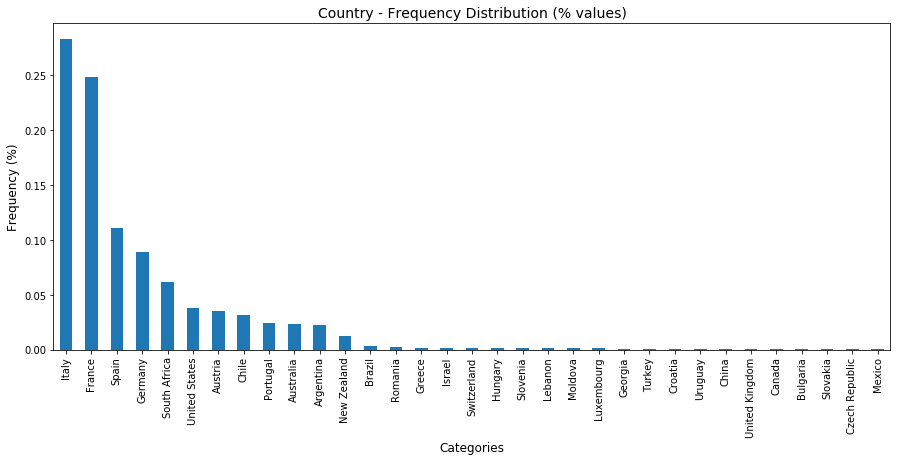

Number of categories: 33


In [47]:
# Let's define a function to represent the frequency distribution of categorical attributes in our Wine dataset.
def plot_distribution(attribute):
    db=pd.DataFrame(wine_data[attribute].value_counts(normalize=True))
    db.plot(kind = 'bar', figsize=(15,6), legend=None)
    plt.title('{} - Frequency Distribution (% values)'.format(attribute), fontsize=14)
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.xlabel('Categories', fontsize=12)
    plt.show()
    print('Number of categories:', wine_data[attribute].nunique())

plot_distribution('Country')

The **"Country" attribute** has 33 unique values, with a high concentration in few countries. Italy and France only, account for more than 50% of the observations; Italy, France, and Spain account for more than 60% of total number of observations. However, besides the imbalanced distribution, no anomalies or mistakes are found.

___

In [48]:
category_count('Region')
print('')
print('"Region" categories frequency (normalized values):')
wine_data['Region'].value_counts(normalize=True)

"Region" attribute - number of categories: 861

"Region" categories frequency (normalized values):


Rioja                                        0.027834
Stellenbosch                                 0.024364
Pfalz                                        0.023930
Toscana                                      0.022195
Champagne                                    0.019014
                                               ...   
Vosne-Romanée Premier Cru                    0.000072
Yakima Valley                                0.000072
Fixin                                        0.000072
Savigny-lès-Beaune 1er Cru 'Les Lavières'    0.000072
Juliénas                                     0.000072
Name: Region, Length: 861, dtype: float64

**"Region" attribute** has 861 unique values, with 2.8% of entries belonging to the category with the highest frequency (Rioja).  
The attribute is interesting for a geographical-descriptive analysis, but, considering the huge number of categories and their frequency distribution, it doesn't seem to have any explanatory value towards the variables Rating and Price.

___

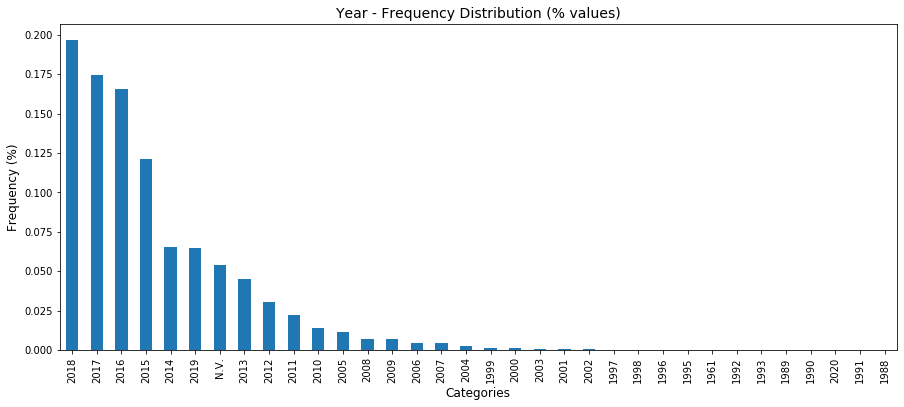

Number of categories: 34


In [49]:
plot_distribution('Year')

**The "Year" attribute ranges from 1988 until 2020, with 1 anomaly: 1961**, which has a very small number of observations.  
The attribute includes N.V., non-vintage, that is wines produced by mixing harvests of two years or more. The N.V. category is the 7th category with the highest frequency, accounting for about 5% of total observations.  
The frequency distribution is highly concentrated towards the last decade (starting from 2011), which accounts for 89% of observations.  

**Let's check into the 1961 anomaly.**

In [50]:
wine_data[wine_data['Year'] == '1961']

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
12902,‘61 Franciacorta Rosé 1961,Italy,Franciacorta,Berlucchi,3.8,37,18.91,1961,sparkling,Berlucchi - ‘61 Franciacorta Rosé 1961 - Franc...
13346,‘61 Franciacorta Brut 1961,Italy,Lombardia,Berlucchi,3.9,282,17.95,1961,sparkling,Berlucchi - ‘61 Franciacorta Brut 1961 - Lomba...
13448,‘61 Franciacorta Satèn 1961,Italy,Franciacorta,Berlucchi,3.9,421,19.90,1961,sparkling,Berlucchi - ‘61 Franciacorta Satèn 1961 - Fran...


The 1961 wines are actually correctly recorded. It seems there's no mistakes in the category.

___

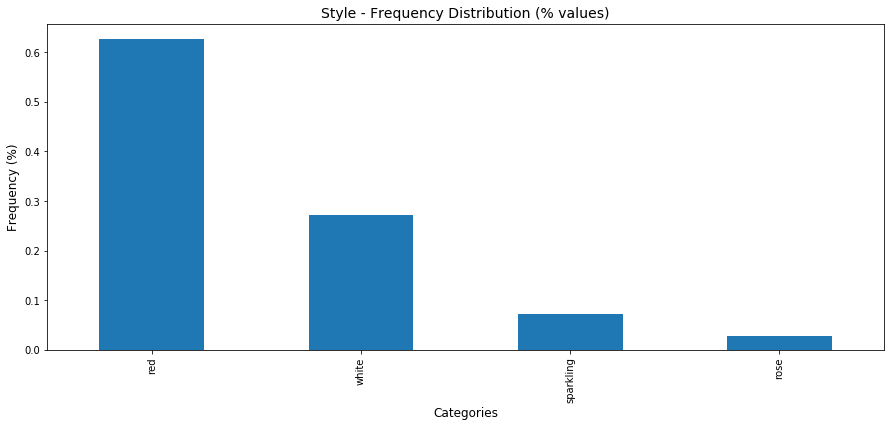

Number of categories: 4


In [51]:
plot_distribution('Style')

**"Style"** frequency distribution is, again, quite imbalanced: red wines account for more than 60% of observations, and Red + White wines account for about 90% of total dataset.  
However, it seems that there are no mistakes, anomalies, or other inconsistencies.

___

In [52]:
category_count('Winery')
print('')
print('"Winery" categories frequency (normalized values):')
wine_data['Winery'].value_counts(normalize=True)

"Winery" attribute - number of categories: 3505

"Winery" categories frequency (normalized values):


Markus Molitor              0.005278
Errazuriz                   0.004193
Torres                      0.003904
Joseph Drouhin              0.003615
M. Chapoutier               0.003036
                              ...   
Home Run                    0.000072
Akilia                      0.000072
Château Tertre Roteboeuf    0.000072
Clos des Lunes              0.000072
Château Ségur               0.000072
Name: Winery, Length: 3505, dtype: float64

The **"Winery attribute** has 3,505 unique values, with 0.5% of entries belonging to the category with the highest frequency (Markus Molitor).  
The attribute might be interesting for a supplier-analysis, but, considering the huge number of categories and their frequency distribution, it doesn't seem to have any explanatory value towards the variables Rating and Price.

### 2.3. EDA - Exploratory Data Analysis <a name="eda"></a>

#### 2.3.1. Descriptive Statistics

In [53]:
# Import necessary libraries
import folium
from scipy import stats
print('Libraries successfully imported')

Libraries successfully imported


In [54]:
# Let's have a look at some descriptive statistics
wine_data.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
count,13832,13832,13832,13832,13832.000000,13832.000000,13832.000000,13832,13832,13832
unique,10934,33,861,3505,NaN,NaN,NaN,34,4,13832
top,Chardonnay 2018,Italy,Rioja,Markus Molitor,NaN,NaN,NaN,2018,red,Caves Primavera - Bairrada Reserva 2013 - Bair...
freq,78,3919,385,73,NaN,NaN,NaN,2722,8665,1
mean,NaN,NaN,NaN,NaN,3.865667,428.324971,33.027764,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.296448,1838.542688,70.904602,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2.200000,25.000000,3.150000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.700000,56.000000,9.900000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.900000,129.000000,15.950000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.100000,336.000000,32.500000,NaN,NaN,NaN


Insights:
* Italy is the biggest wine producer: 28% of Vivino.com supply.
* As already observed during the outlier analysis, in "Rating" attribute, the mean (3.87) is pretty close to the median (3.9): the attribute has an almost normal distribution.
* "NumberOfRatings" and "Price" mean is much higher than the median, and the max values are way higher than the 75% quartile:
  * Price - mean: 33.03; median:16.0. 75%; 32.5; max: 3410.79 .
  * Number of Ratings - mean: 428.32; median: 129. 75%; 336; max: 94,287. 
  
  The attributes have a very right-skewed distribution.  
  
  
* 20% of Vivino.com wines are produced in 2018 (the year with the highest frequency).
* Red wine is, by far, the most produced wine: 63% of the whole supply. 

___

Let's visualize some bar plots about the data.

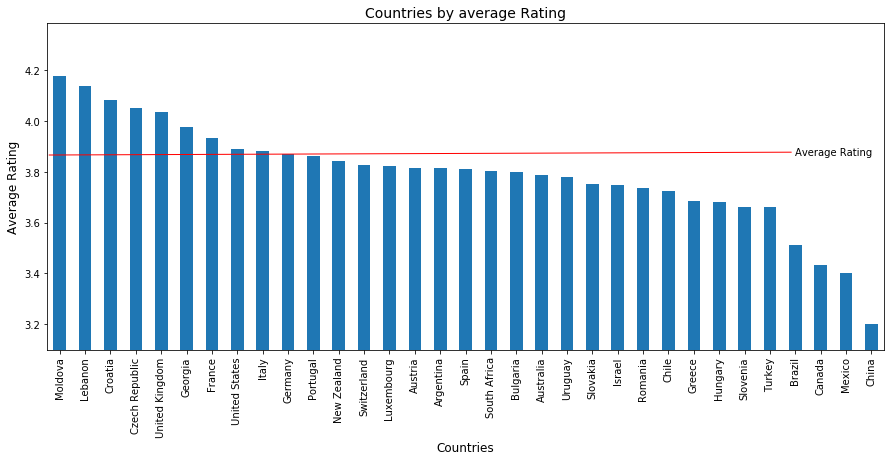

In [55]:
wine_data.groupby(['Country'])['Rating'].mean().sort_values(ascending=False).plot(kind = 'bar', figsize=(15,6), legend=None)
plt.title('Countries by average Rating', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Countries', fontsize=12)
plt.ylim(3.1)
plt.annotate('Average Rating', xy=(-0.5,wine_data['Rating'].mean()), xytext=(29,wine_data['Rating'].mean()), xycoords='data',\
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=1))
plt.show()

Moldova wines have the highest average rating score, that is 4.175. That's quite an unexpected result: I've never really heard of Moldova wines; however, their share is, on the total dataset, very low. It would be interesting to know if this difference between Moldova's wine average rating and the overall (population) average rating is statistically significant or just due to chance, or to the natural variability of the data.  
**[1. Hypothesis Testing:](#hypothesistesting)  
Is the difference between Moldova's wine average rating and the population (whole dataset) average rating statistically significant?**

___

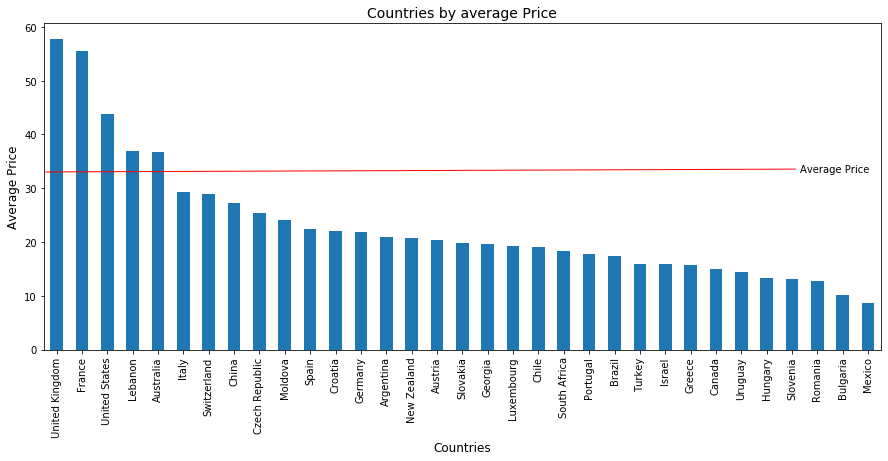

In [56]:
wine_data.groupby(['Country'])['Price'].mean().sort_values(ascending=False).plot(kind = 'bar', figsize=(15,6), legend=None)
plt.title('Countries by average Price', fontsize=14)
plt.ylabel('Average Price', fontsize=12)
plt.xlabel('Countries', fontsize=12)
plt.annotate('Average Price', xy=(-0.5,wine_data['Price'].mean()), xytext=(29.3,wine_data['Price'].mean()), xycoords='data',\
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=1))
plt.show()

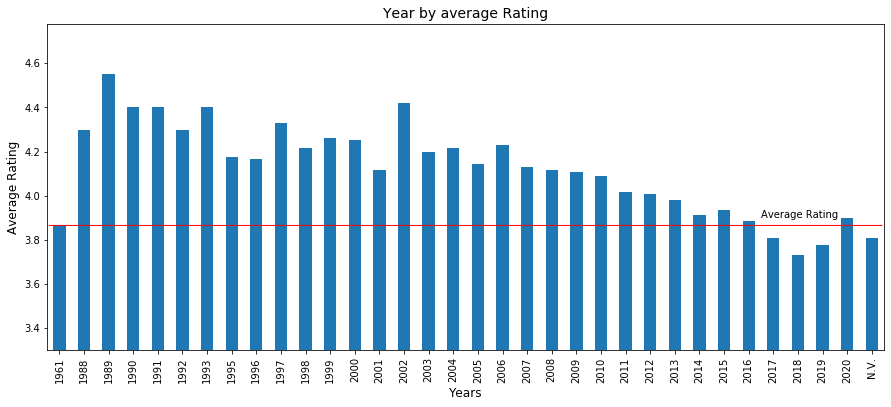

In [57]:
wine_data.groupby(['Year'])['Rating'].mean().plot(kind = 'bar', figsize=(15,6), legend=None)
plt.title('Year by average Rating', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.ylim(3.3)
plt.annotate('', xy=(-0.5,wine_data['Rating'].mean()), xytext=(33.5,wine_data['Rating'].mean()), xycoords='data',\
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=1))
plt.annotate('Average Rating', xy=(28.5,3.9))
plt.show()

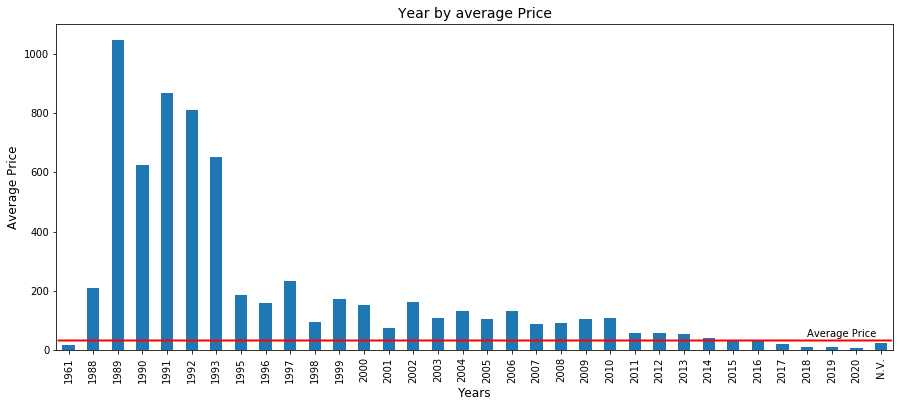

In [58]:
wine_data.groupby(['Year'])['Price'].mean().plot(kind = 'bar', figsize=(15,6), legend=None)
plt.title('Year by average Price', fontsize=14)
plt.ylabel('Average Price', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.annotate('', xy=(-0.5,wine_data['Price'].mean()), xytext=(33.5,wine_data['Price'].mean()), xycoords='data',\
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=2))
plt.annotate('Average Price', xy=(30,45))
plt.show()

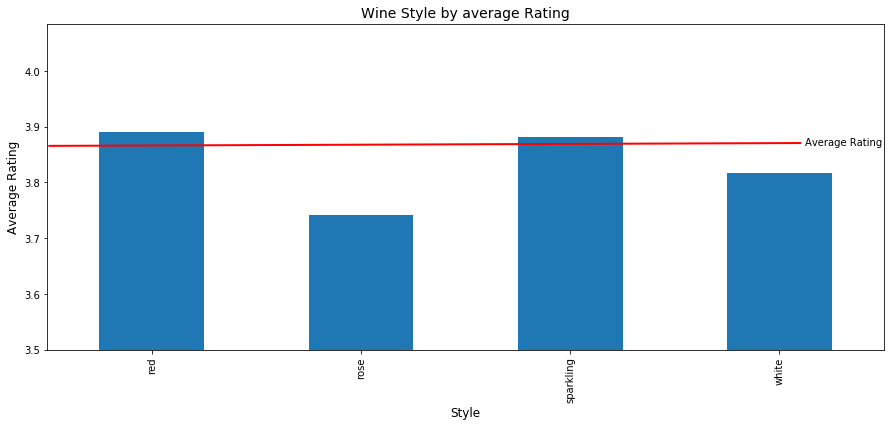

In [59]:
wine_data.groupby(['Style'])['Rating'].mean().plot(kind = 'bar', figsize=(15,6), legend=None)
plt.title('Wine Style by average Rating', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Style', fontsize=12)
plt.ylim(3.5)
plt.annotate('Average Rating', xy=(-0.5,wine_data['Rating'].mean()), xytext=(3.12,wine_data['Rating'].mean()), xycoords='data',\
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=2))
plt.show()

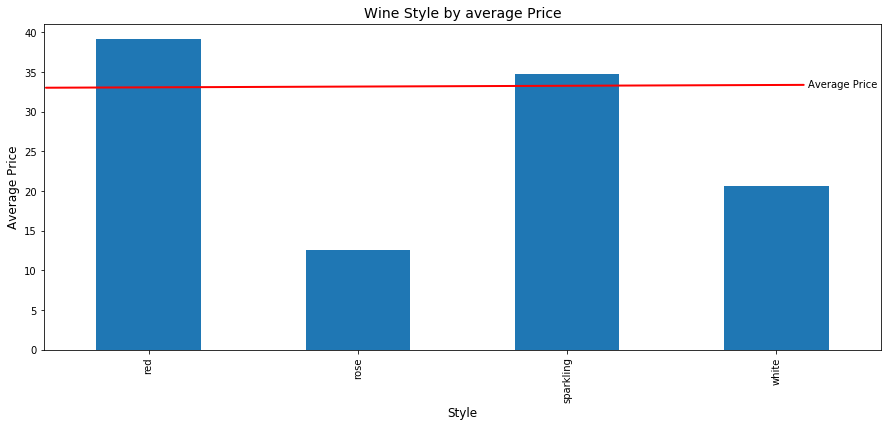

In [60]:
wine_data.groupby(['Style'])['Price'].mean().plot(kind = 'bar', figsize=(15,6), legend=None)
plt.title('Wine Style by average Price', fontsize=14)
plt.ylabel('Average Price', fontsize=12)
plt.xlabel('Style', fontsize=12)
plt.annotate('Average Price', xy=(-0.5,wine_data['Price'].mean()), xytext=(3.15,wine_data['Price'].mean()), xycoords='data',\
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=2))
plt.show()

Insights:
* France is the only top producer whose mean price per bottle is above the average.
* The last 3 years (2017, 2018, 2019) are the only years whose mean rating score is below the average (alongside with the non-vintage wines). 
* Wines produced from 1989 to 1993 have a way higher price than all other wines (however the number of wines produced in those years, in the dataset, is very limited; they are outliers).  
**[2. Hypothesis Testing:](#hypothesistesting)    
Is the difference between 1989-1993 average wine price and population average price statistically significant (or due to chance)?**  
* Red wine is the top rated style, although there's no much difference in terms of average Rating, when it comes to wine styles.
* Red wines are the most expensive whilst Rose wines are the least pricey (in terms of average price).

___

Let's create a world choropleth map, with the wine producing countries. 

In [61]:
# let's create a dataset with the countries and the number of wines, per country, in Vivino.com
wine_countries = pd.DataFrame(wine_data.groupby(['Country'])['Unique_Name'].count()).reset_index().\
rename(columns={'Unique_Name':'number_of_wines', 'Country':'name'})
# let's create a map object
wine_map = folium.Map(location = [41.902782, 12.496366],
                      zoom_start=2,
                      tiles ='OpenStreetMap')
# let's define the threshold scale
q0, q75, q85, q90, q95, q100 = np.percentile(wine_countries['number_of_wines'], [0, 75, 85, 90, 95, 100])
scale = [q0, q75, q85, q90, q95, q100+1]
# let's create the choropleth map
countries=r'C:\Users\HP\Desktop\COURSERA\IBM Machine Learning Professional Certificate\01_Exploratory Data Analysis for Machine Learning\PROJECT\world_countries_1.json'
wine_map.choropleth(geo_data=countries,\
                    data=wine_countries,\
                    columns=['name', 'number_of_wines'],\
                    key_on='feature.properties.name',\
                    threshold_scale= scale,\
                    legend_name='',\
                    fill_opacity=0.7,\
                    line_opacity=0.2,\
                    fill_color='PuBuGn')

wine_map

Wine production is very concentrated in few countries: Italy, France, Spain, Germany and South Africa.

##### Top 5 countries analysis

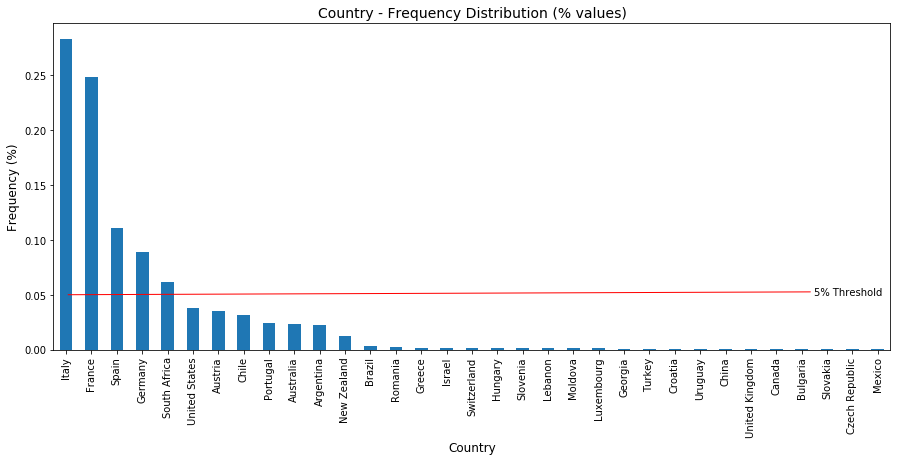

In [62]:
pd.DataFrame(wine_data['Country'].value_counts(normalize=True)).plot(kind = 'bar', figsize=(15,6), legend=None)
plt.title('Country - Frequency Distribution (% values)', fontsize=14)
plt.ylabel('Frequency (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.annotate('5% Threshold', xy=(0,0.05), xytext=(29.5,0.05), xycoords='data',\
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=1))
plt.show()

Top 5 countries in Vivino.com (frequency distribution > 5%):
1. Italy
2. France
3. Spain
4. Germany
5. South Africa

In [63]:
# Country VS Year - let's group by country and year
country_vs_year = wine_data.groupby(['Country', 'Year'], as_index=False)['Unique_Name'].count()
country_vs_year.rename(columns={'Unique_Name':'number_of_wines'}, inplace=True)
country_vs_year.head()

,Country,Year,number_of_wines
0,Argentina,2008,1
1,Argentina,2009,1
2,Argentina,2011,1
3,Argentina,2012,4
4,Argentina,2013,18


In [64]:
# Let's filter for the top 5 countries
top_country_list = ['Italy', 'France', 'Spain', 'Germany', 'South Africa']
top5_numwines = country_vs_year[country_vs_year['Country'].isin(top_country_list)]['number_of_wines'].sum()
print('Share of top 5 countries: {}%.'.format(round(top5_numwines/wine_data.shape[0]*100,2)))

Share of top 5 countries: 79.25%.


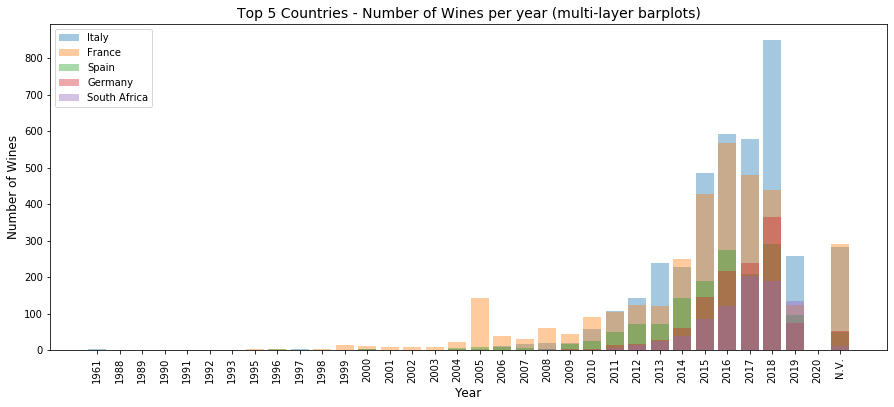

In [65]:
# Create a dataset with only the top 5 countries, and number of wines per year
top_country_ds = country_vs_year[country_vs_year['Country'].isin(top_country_list)]
# Compute a cross tabulation 
top_country_stacked = pd.crosstab(top_country_ds.Year,\
                                  top_country_ds.Country, values = top_country_ds.number_of_wines, aggfunc="sum")
# Create a single dataset per country
italy = top_country_stacked['Italy']
france = top_country_stacked['France']
spain = top_country_stacked['Spain']
germany = top_country_stacked['Germany']
south_africa = top_country_stacked['South Africa']
# Create a multi-layer barplot
plt.figure(figsize=(15,6))
plt.bar(top_country_stacked.index, top_country_stacked['Italy'], alpha=0.4, label='Italy')
plt.bar(top_country_stacked.index, top_country_stacked['France'], alpha=0.4, label='France')
plt.bar(top_country_stacked.index, top_country_stacked['Spain'], alpha=0.4, label='Spain')
plt.bar(top_country_stacked.index, top_country_stacked['Germany'], alpha=0.4, label='Germany')
plt.bar(top_country_stacked.index, top_country_stacked['South Africa'], alpha=0.4, label='South Africa')
plt.title('Top 5 Countries - Number of Wines per year (multi-layer barplots)', fontsize=14)
plt.ylabel('Number of Wines', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

Text(0, 0.5, 'Number of Wines')

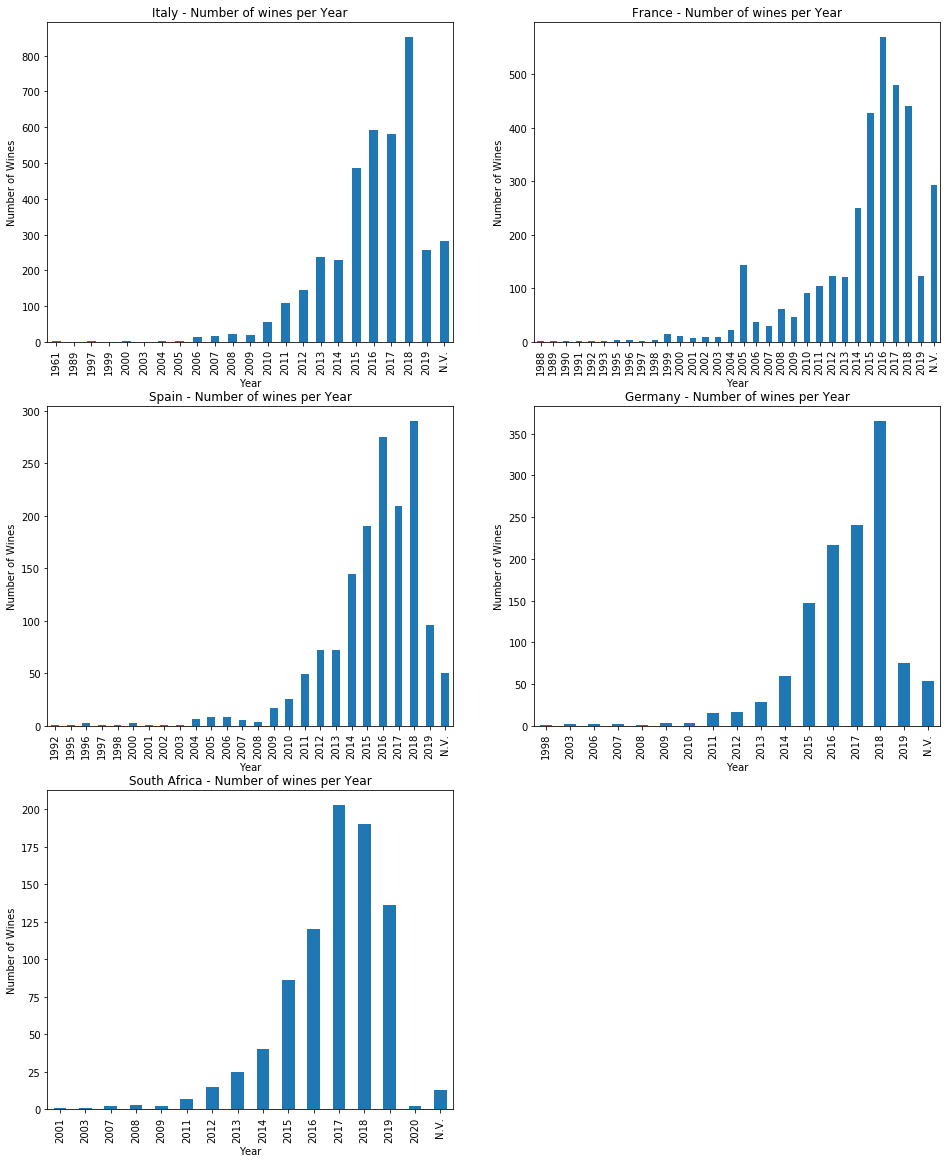

In [66]:
graph = plt.figure(figsize=(16,20))
italy = graph.add_subplot(3,2,1)
france = graph.add_subplot(3,2,2)
spain = graph.add_subplot(3,2,3)
germany = graph.add_subplot(3,2,4)
south_africa = graph.add_subplot(3,2,5)

top_country_ds[top_country_ds['Country'] == 'Italy'].plot('Year', 'number_of_wines', kind='bar', legend=None, ax=italy)
italy.set_title('Italy - Number of wines per Year')
italy.set_ylabel('Number of Wines')

top_country_ds[top_country_ds['Country'] == 'France'].plot('Year', 'number_of_wines', kind='bar', legend=None, ax=france)
france.set_title('France - Number of wines per Year')
france.set_ylabel('Number of Wines')

top_country_ds[top_country_ds['Country'] == 'Spain'].plot('Year', 'number_of_wines', kind='bar', legend=None, ax=spain)
spain.set_title('Spain - Number of wines per Year')
spain.set_ylabel('Number of Wines')

top_country_ds[top_country_ds['Country'] == 'Germany'].plot('Year', 'number_of_wines', kind='bar', legend=None, ax=germany)
germany.set_title('Germany - Number of wines per Year')
germany.set_ylabel('Number of Wines')

top_country_ds[top_country_ds['Country'] == 'South Africa'].plot('Year', 'number_of_wines', kind='bar', legend=None,\
                                                                 ax=south_africa)
south_africa.set_title('South Africa - Number of wines per Year')
south_africa.set_ylabel('Number of Wines')

Insights:
* The number of wines in Vivino.com increases as the year increases as well, until 2018.  
* Italy has been increasing its share since 2012, overtaking France as the biggest wine supplier in 2015.
* In 2018 (the year with the biggest production), Italy alone accounts for more than 30% of wine supply.
* Germany has been steadily increasing its share as well since 2014.
* Since 2016, French wine share has been decreasing.

___

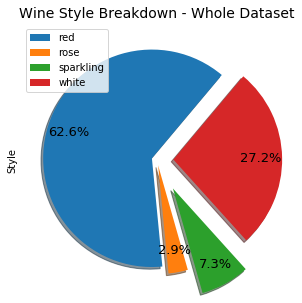

In [67]:
wine_data.groupby(['Style'])['Style'].count().plot(kind='pie',
                                                  autopct='%1.1f%%',
                                                  shadow=True,
                                                  pctdistance=0.8,
                                                  startangle=50,
                                                  explode=[0.05, 0.05, 0.3, 0.15],
                                                  figsize=(15,5),
                                                  fontsize=13,
                                                  labeldistance=None)
plt.legend()
plt.title('Wine Style Breakdown - Whole Dataset', fontsize=14)
plt.show()

In [68]:
# create a dataset with the top 5 countries, wine style, and number of wines (% values)
country_vs_style = wine_data.groupby(['Country', 'Style'], as_index=False)['Unique_Name'].count()
country_vs_style.rename(columns={'Unique_Name':'number_of_wines'}, inplace=True)

top5_style = country_vs_style[country_vs_style['Country'].isin(top_country_list)]
top5_style = pd.crosstab(top5_style['Country'], top5_style['Style'], values = top5_style['number_of_wines'], aggfunc="sum")
top5_style['total'] = top5_style['red'] + top5_style['rose'] + top5_style['sparkling'] + top5_style['white']
top5_style['red'] = top5_style['red'] / top5_style['total']
top5_style['rose'] = top5_style['rose'] / top5_style['total']
top5_style['sparkling'] = top5_style['sparkling'] / top5_style['total']
top5_style['white'] = top5_style['white'] / top5_style['total']
top5_style.drop(['total'], axis=1, inplace=True)
top5_style

Style,red,rose,sparkling,white
Country,,,,
France,0.656769,0.037555,0.115866,0.189811
Germany,0.201790,0.012205,0.063466,0.722539
Italy,0.676193,0.026027,0.095688,0.202092
South Africa,0.591017,0.033097,0.026005,0.349882
Spain,0.744945,0.042401,0.045662,0.166993


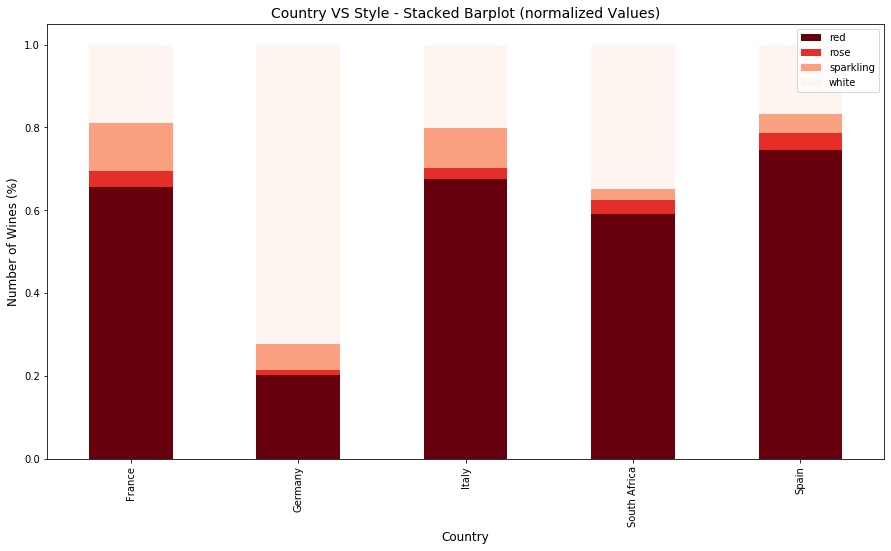

In [69]:
top5_style.plot(kind = 'bar', stacked = True, figsize = (15,8), colormap='Reds_r')
plt.title('Country VS Style - Stacked Barplot (normalized Values)', fontsize=14)
plt.ylabel('Number of Wines (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.legend(loc='best')
plt.show()

In [70]:
# create a dataset with wine styles, the top 5 countries, and number of wines (% values)
style_vs_country = wine_data.groupby(['Style', 'Country'], as_index=False)['Unique_Name'].count()
style_vs_country.rename(columns={'Unique_Name':'number_of_wines'}, inplace=True)

top5_1 = style_vs_country[style_vs_country['Country'].isin(top_country_list)]
top5_1 = pd.crosstab(top5_1['Style'], top5_1['Country'], values = top5_1['number_of_wines'], aggfunc="sum")

top5_1['total'] = top5_1['France'] + top5_1['Germany'] + top5_1['Italy'] + top5_1['South Africa'] + top5_1['Spain']
top5_1['France'] = top5_1['France'] / top5_1['total']
top5_1['Germany'] = top5_1['Germany'] / top5_1['total']
top5_1['Italy'] = top5_1['Italy'] / top5_1['total']
top5_1['South Africa'] = top5_1['South Africa'] / top5_1['total']
top5_1['Spain'] = top5_1['Spain'] / top5_1['total']
top5_1.drop(['total'], axis=1, inplace=True)
top5_1

Country,France,Germany,Italy,South Africa,Spain
Style,,,,,
red,0.331960,0.036492,0.389935,0.073573,0.168040
rose,0.380531,0.044248,0.300885,0.082596,0.191740
sparkling,0.422057,0.082715,0.397667,0.023330,0.074231
white,0.226075,0.307906,0.274619,0.102635,0.088766


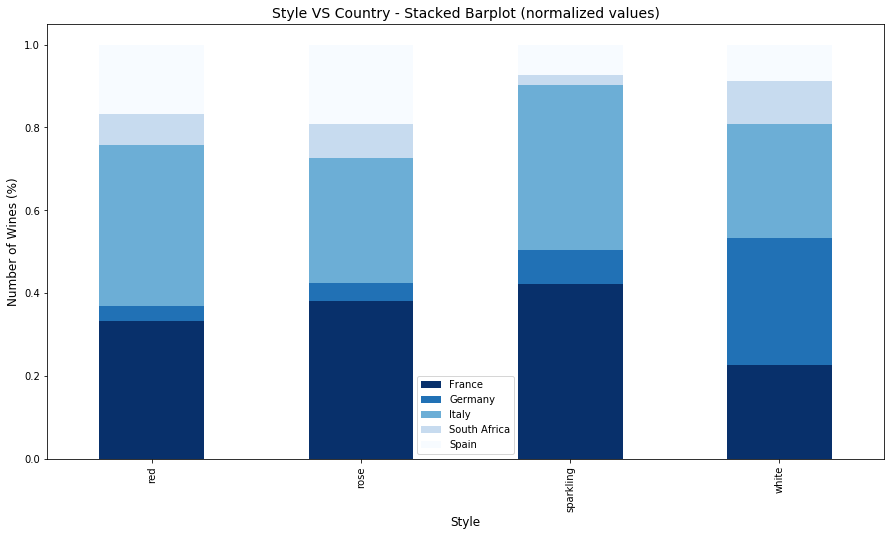

In [71]:
top5_1.plot(kind = 'bar', stacked = True, figsize = (15,8), colormap='Blues_r')
plt.title('Style VS Country - Stacked Barplot (normalized values)', fontsize=14)
plt.ylabel('Number of Wines (%)', fontsize=12)
plt.xlabel('Style', fontsize=12)
plt.legend(loc='best')
plt.show()

Insights:
* Italy and France are the biggest producers for red, rose', and sparkling wines.
* Germany is the only country, amongst the top 5, that produces more white wines than red wines.
* German white wine share is greater than Italy and France's share.
* Italy and France have a very similar wine style breakdown.
* Spain has a considerable share on the red wines: 16.8%

##### Vivino supplier analysis 

In [72]:
top10_wineries = wine_data.groupby(['Winery','Country'], as_index=False)['Unique_Name']\
.count().sort_values(by='Unique_Name', ascending=False).rename(columns={'Unique_Name':'number_of_wines'}).head(10)
total_wines = wine_data.shape[0]
top10_wineries['share (%)'] = round(top10_wineries['number_of_wines']/total_wines*100,2)
print('Top 10 Wineries (per number of wines) - Vivino.com:')
top10_wineries

Top 10 Wineries (per number of wines) - Vivino.com:


,Winery,Country,number_of_wines,share (%)
2293,Markus Molitor,Germany,73,0.53
1580,Errazuriz,Chile,58,0.42
3226,Torres,Spain,54,0.39
1979,Joseph Drouhin,France,50,0.36
1733,Gaja,Italy,42,0.30
2246,M. Chapoutier,France,42,0.30
1530,E. Guigal,France,36,0.26
2605,Paul Jaboulet Aîné,France,36,0.26
108,Antinori,Italy,36,0.26
3406,Von Winning,Germany,34,0.25


In [73]:
top10_wineries['avg_rating'] = 'Nan'
top10_wineries['avg_price'] = 'Nan'
top10_wineries['population_avgrating'] = 'Nan'
top10_wineries['population_avgprice'] = 'Nan'
top10_wineries['above_avgrating'] = 'Nan'
top10_wineries['above_avgprice'] = 'Nan'


for w in top10_wineries.index:
    top10_wineries['avg_rating'].loc[w] = wine_data[wine_data['Winery'] == top10_wineries.loc[w]['Winery']]['Rating'].mean()
    top10_wineries['avg_price'].loc[w] = wine_data[wine_data['Winery'] == top10_wineries.loc[w]['Winery']]['Price'].mean()
    top10_wineries['population_avgrating'].loc[w] = wine_data['Rating'].mean()
    top10_wineries['population_avgprice'].loc[w] = wine_data['Price'].mean()
    
    if top10_wineries['avg_rating'].loc[w] <= top10_wineries['population_avgrating'].loc[w]:
        top10_wineries['above_avgrating'].loc[w] = False
    else:
        top10_wineries['above_avgrating'].loc[w] = True
        
    if top10_wineries['avg_price'].loc[w] <= top10_wineries['population_avgprice'].loc[w]:
        top10_wineries['above_avgprice'].loc[w] = False
    else:
        top10_wineries['above_avgprice'].loc[w] = True

top10_wineries

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Winery,Country,number_of_wines,share (%),avg_rating,avg_price,population_avgrating,population_avgprice,above_avgrating,above_avgprice
2293,Markus Molitor,Germany,73,0.53,4.00959,33.8271,3.86567,33.0278,True,True
1580,Errazuriz,Chile,58,0.42,3.88448,38.5855,3.86567,33.0278,True,True
3226,Torres,Spain,54,0.39,3.81111,24.8,3.86567,33.0278,False,False
1979,Joseph Drouhin,France,50,0.36,3.98,66.6082,3.86567,33.0278,True,True
1733,Gaja,Italy,42,0.30,4.36667,197.146,3.86567,33.0278,True,True
2246,M. Chapoutier,France,42,0.30,4.0119,69.8919,3.86567,33.0278,True,True
1530,E. Guigal,France,36,0.26,3.99444,61.3017,3.86567,33.0278,True,True
2605,Paul Jaboulet Aîné,France,36,0.26,3.95,66.9656,3.86567,33.0278,True,True
108,Antinori,Italy,36,0.26,4.16389,100.398,3.86567,33.0278,True,True
3406,Von Winning,Germany,34,0.25,4.00882,24.9438,3.86567,33.0278,True,False


Insights:
* Only 1 (Torres, Spain) out of the top 10 wineries has a rating score (average) lower than the overall rating average.
* Only 2 (Torres, Spain; Von Winning, Germany) out of the top 10 wineries have an average wine price less than the overall price average.
* Gaja, Italy, (5th winery per number of wines) is the winery, amongst the top 10, with the highest average rating and price.  
**[3. Hypothesis Testing:](#hypothesistesting)    
Is the difference between Gaja average rating/price and population average rating/price statistically significant (or due to chance)?**

In [74]:
top10_price = wine_data.groupby(['Winery', 'Country'], as_index=False)[['Price', 'Rating']].mean()\
.sort_values(by=['Price','Rating'],ascending=False).head(10)

print('Wineries by average price (top 10) - Vivino.com:')
top10_price

Wineries by average price (top 10) - Vivino.com:


,Winery,Country,Price,Rating
2742,Pétrus,France,3410.790000,4.700000
607,Château Ausone,France,1087.540000,4.600000
1337,Domaine Comte Georges de Vogüé,France,995.000000,4.400000
2345,Masseto,Italy,963.490000,4.733333
805,Château Lafite Rothschild,France,849.175000,4.483333
2729,Promontory,United States,721.340000,4.700000
900,Château Mouton Rothschild,France,711.102000,4.470000
1760,Giacomo Conterno,Italy,678.515000,4.700000
751,Château Haut-Brion,France,625.534444,4.544444
672,Château Cheval Blanc,France,601.612500,4.500000


In [75]:
top10_rating = wine_data.groupby(['Winery', 'Country'], as_index=False)[['Rating', 'Price']].mean()\
.sort_values(by=['Rating', 'Price'],ascending=False).head(10)

print('Wineries by average rating (top 10) - Vivino.com:')
top10_rating

Wineries by average rating (top 10) - Vivino.com:


,Winery,Country,Rating,Price
2345,Masseto,Italy,4.733333,963.490000
2742,Pétrus,France,4.700000,3410.790000
2729,Promontory,United States,4.700000,721.340000
1263,Dal Forno Romano,Italy,4.700000,270.630000
1760,Giacomo Conterno,Italy,4.700000,678.515000
3293,Vega Sicilia,Spain,4.671429,312.807143
3,4G Wine Estate,South Africa,4.650000,295.850000
607,Château Ausone,France,4.600000,1087.540000
2144,Le Dome,France,4.600000,399.950000
1211,Continuum,United States,4.600000,365.550000


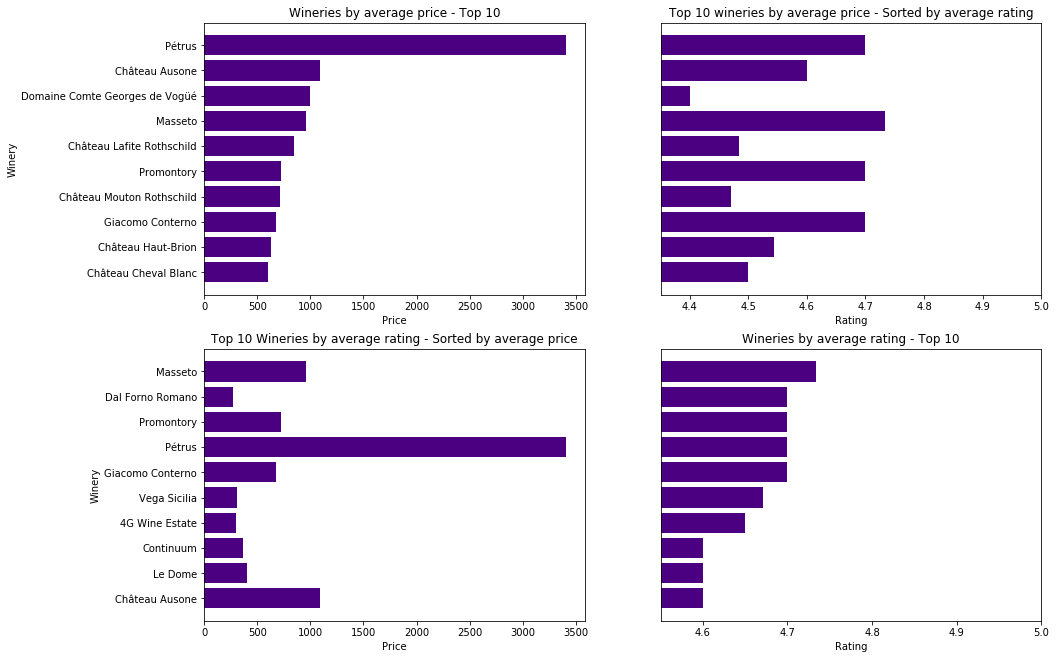

In [76]:
# Change the data sorting for better visualization
top10_price = top10_price.sort_values(by='Price', ascending=True)
top10_rating = top10_rating.sort_values(by='Rating', ascending=True)

# Create the figure object and the plot
fig=plt.figure(figsize=(15,11))
top10wine_price = fig.add_subplot(2,2,1)
top10wine_prating = fig.add_subplot(2,2,2)
top10wine_rating = fig.add_subplot(2,2,3)
top10wine_ratprice = fig.add_subplot(2,2,4)

top10wine_price.barh(top10_price['Winery'], top10_price['Price'], color='indigo')
top10wine_price.set_title('Wineries by average price - Top 10')
top10wine_price.set_xlabel('Price')
top10wine_price.set_ylabel('Winery')

top10wine_prating.barh(top10_price['Winery'], top10_price['Rating'], color='indigo')
top10wine_prating.set_title('Top 10 wineries by average price - Sorted by average rating')
top10wine_prating.set_xlabel('Rating')
top10wine_prating.set_xlim(4.35,5)
top10wine_prating.set_yticks([])

top10wine_rating.barh(top10_rating['Winery'], top10_rating['Price'], color='indigo')
top10wine_rating.set_title('Top 10 Wineries by average rating - Sorted by average price')
top10wine_rating.set_xlabel('Price')
top10wine_rating.set_ylabel('Winery')

top10wine_ratprice.barh(top10_rating['Winery'], top10_rating['Rating'], color='indigo')
top10wine_ratprice.set_title('Wineries by average rating - Top 10')
top10wine_ratprice.set_xlabel('Rating')
top10wine_ratprice.set_xlim(4.55,5)
top10wine_ratprice.set_yticks([])

plt.show()

In [77]:
# Let's have a look at the most expensive winery
wine_data[wine_data['Winery'] == 'Pétrus']

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
2344,Pomerol 2012,France,Pomerol,Pétrus,4.7,204,3410.79,2012,red,Pétrus - Pomerol 2012 - Pomerol


In [78]:
# Let's have a look at the winery with the highest average rating
wine_data[wine_data['Winery'] == 'Masseto']

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style,Unique_Name
6239,Toscana 2013,Italy,Toscana,Masseto,4.7,538,965.15,2013,red,Masseto - Toscana 2013 - Toscana
6883,Toscana 2011,Italy,Toscana,Masseto,4.7,628,965.15,2011,red,Masseto - Toscana 2011 - Toscana
8073,Toscana 2016,Italy,Toscana,Masseto,4.8,85,960.17,2016,red,Masseto - Toscana 2016 - Toscana


In [79]:
# Let's merge the 2 datasets
top10_join = pd.merge(top10_price, top10_rating, on='Winery')
top10_join['Winery']

0    Giacomo Conterno
1          Promontory
2             Masseto
3      Château Ausone
4              Pétrus
Name: Winery, dtype: object

Highlights:
* The top 10 wineries, per number of wines, in Vivino.com are neither amongst the best rated nor amongst the most expensive.
* There is a clear overlap amongst the top rated and the most expensive winery: 5 wineries (Giacomo Conterno, Promontory, Masseto, Château Ausone, and Pétrus) belong to both groups.
* Pétrus, France, is, by far, the most expensive winery, with only 1 observation; it is the most extreme Price outlier.
* Masseto, Italy, is the top rated winery, 4th by average wine price.
* 7 of the top-10 most expensive wineries are from France.
* Amongst te top-10 rated wineries, both Italy and France have the highest number (3 each).

#### 2.3.2. Data Mining  
*(Uncovering correlations, patterns, and relationships between variables.)*

##### Target: Rating.

Let's check for relationships and patterns between the categorical variables and the Rating variable (the target).

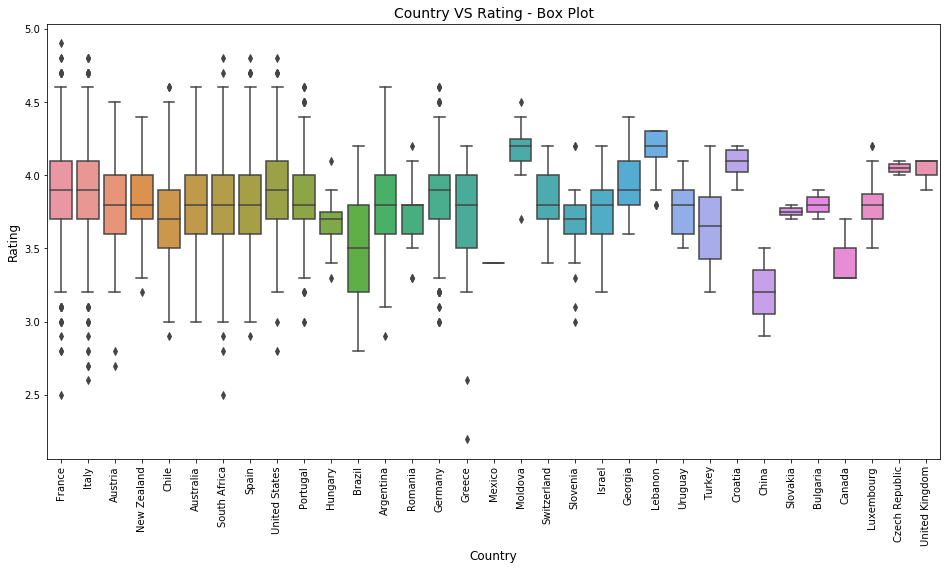

In [80]:
# let's check for relationships between "Country" and "Rating"
plt.figure(figsize=(16,8))
sns.boxplot(x='Country', y='Rating', data=wine_data)
plt.title('Country VS Rating - Box Plot', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.show()

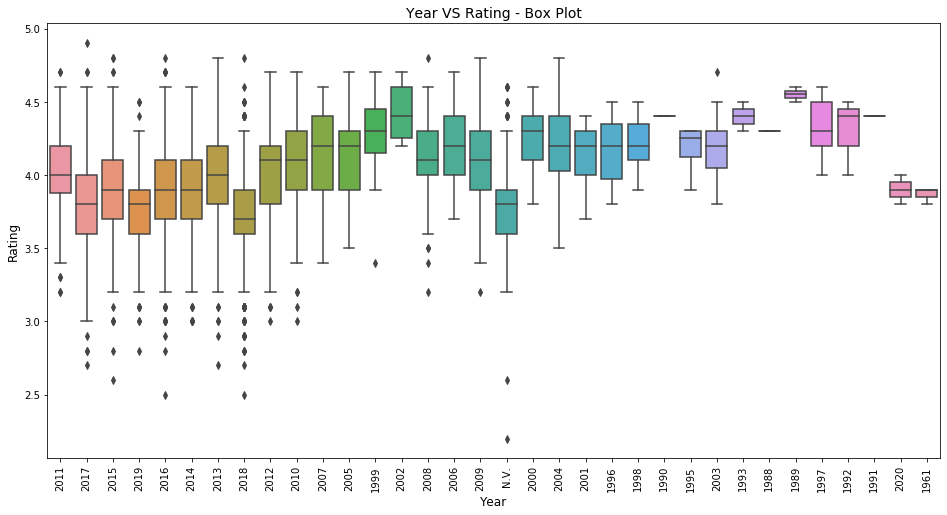

In [81]:
# let's check for relationships between "Year" and "Rating"
plt.figure(figsize=(16,8))
sns.boxplot(x='Year', y='Rating', data=wine_data)
plt.title('Year VS Rating - Box Plot', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=90)
plt.show()

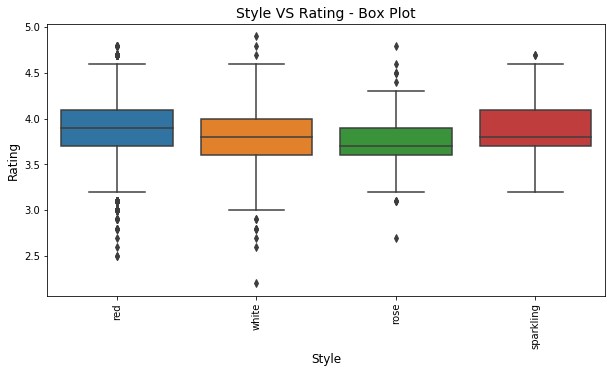

In [82]:
# let's check for relationships between "Style" and "Rating"
plt.figure(figsize=(10,5))
sns.boxplot(x='Style', y='Rating', data=wine_data)
plt.title('Style VS Rating - Box Plot', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.xlabel('Style', fontsize=12)
plt.xticks(rotation=90)
plt.show()

It seems there's a significant overlap between the categories belonging to the "Country", "Year", and "Style" attributes, in relation to the "Rating" variable; that means that possible relationships between the features and the target, in this case "Rating", are not very significant.  
**Let's try with a different attribute categorization, based on category frequency or other criteria.**

######  Country & Year New categories - frequency-based.

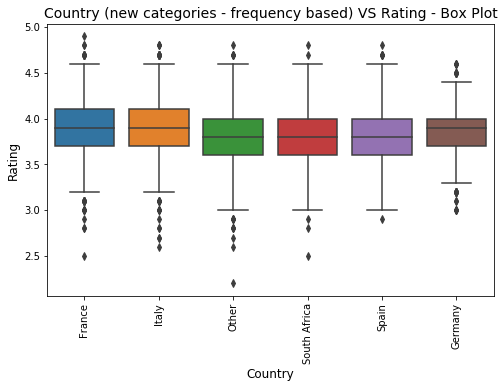

In [83]:
# create a copy of database
copy_winedata = wine_data.copy(deep=True)

# create a new category, "Other", for all countries whose frequency is less than 5%
a = pd.DataFrame(wine_data['Country'].value_counts(normalize=True) < 0.05)
other_countries = a[a['Country'] == True].index.to_list()
copy_winedata['Country'].replace(to_replace=[other_countries], value='Other', inplace=True)

# let's create a new box plot "Country" VS "Rating", with the new categories
plt.figure(figsize=(8,5))
sns.boxplot(x='Country', y='Rating', data=copy_winedata)
plt.title('Country (new categories - frequency based) VS Rating - Box Plot', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.show()

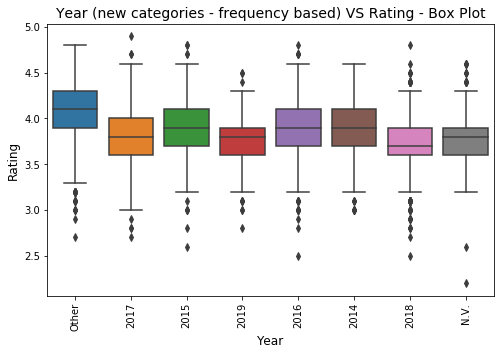

In [84]:
# Create a new category, "Other", for all years whose frequency is less than 5%
a = pd.DataFrame(wine_data['Year'].value_counts(normalize=True) < 0.05)
other_years = a[a['Year'] == True].index.to_list()
copy_winedata['Year'].replace(to_replace=[other_years], value='Other', inplace=True)

# let's create a new box plot "Year" VS "Rating", with the new categories
plt.figure(figsize=(8,5))
sns.boxplot(x='Year', y='Rating', data=copy_winedata)
plt.title('Year (new categories - frequency based) VS Rating - Box Plot', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Again, relationships between the "Country"/"Year" features and the "Rating" target still fail to appear. Let's try with another type of categorization, not based on the frequency of categories.

##### Country & Year New categories - Continents and Time Periods

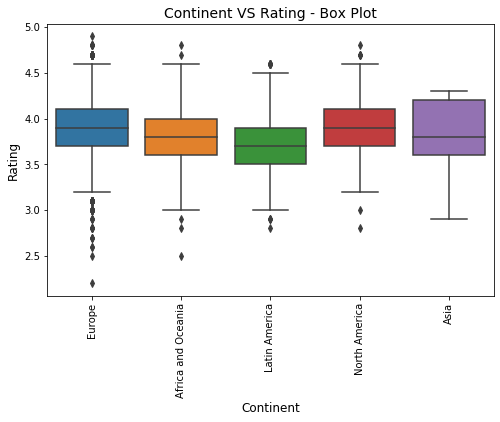

In [85]:
# create a new copy of database
copy_1_winedata = wine_data.copy(deep=True)

# let's try with a different categorization based on geographical features, like "Continent"
europe = ['France', 'Italy', 'Austria', 'Spain', 'Portugal', 'Hungary', 'Romania', 'Germany', 'Greece', 'Moldova',\
          'Switzerland', 'Slovenia', 'Georgia', 'Croatia', 'Slovakia', 'Bulgaria', 'Luxembourg', 'Czech Republic',\
          'United Kingdom']
asia = ['Israel', 'Lebanon', 'Turkey', 'China']
africa_oceania = ['New Zealand', 'Australia', 'South Africa']
latin_america = ['Chile', 'Brazil', 'Argentina', 'Mexico', 'Uruguay']
north_america = ['United States', 'Canada']

copy_1_winedata['Country'].replace(to_replace=[europe], value='Europe', inplace=True)
copy_1_winedata['Country'].replace(to_replace=[asia], value='Asia', inplace=True)
copy_1_winedata['Country'].replace(to_replace=[africa_oceania], value='Africa and Oceania', inplace=True)
copy_1_winedata['Country'].replace(to_replace=[latin_america], value='Latin America', inplace=True)
copy_1_winedata['Country'].replace(to_replace=[north_america], value='North America', inplace=True)

# let's create a new box plot "Country" VS "Rating", with the new categories
plt.figure(figsize=(8,5))
sns.boxplot(x='Country', y='Rating', data=copy_1_winedata)
plt.title('Continent VS Rating - Box Plot', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.xticks(rotation=90)
plt.show()

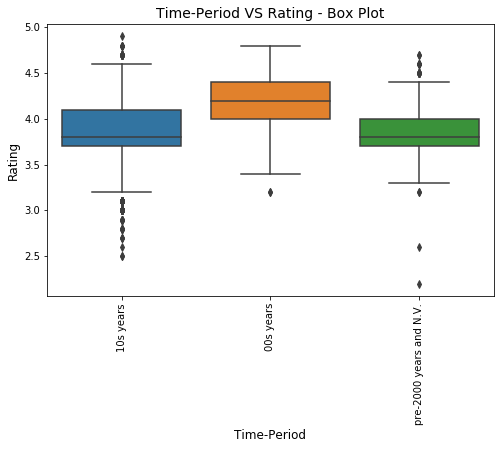

In [86]:
# let's try with a different categorization for the "Year" attribute
pre_2000 = ['1961','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','N.V.']
years_00 = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009']
years_10 = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
copy_1_winedata['Year'].replace(to_replace=[pre_2000], value='pre-2000 years and N.V.', inplace=True)
copy_1_winedata['Year'].replace(to_replace=[years_00], value='00s years', inplace=True)
copy_1_winedata['Year'].replace(to_replace=[years_10], value='10s years', inplace=True)

# let's create a new box plot "Year" VS "Rating", with the new categories - time period based
plt.figure(figsize=(8,5))
sns.boxplot(x='Year', y='Rating', data=copy_1_winedata)
plt.title('Time-Period VS Rating - Box Plot', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.xlabel('Time-Period', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Any relationships between "Country" and "Rating" still fail to appear.  
The 00s decade wines seem to have, overall, a higher rating than the other time-periods, although the category overlap is still significant.  
I am going to use the **Analysis of Variance - ANOVA** - method to compare the attribute's impact, and double-check whether the new attribute categorization, somehow, can increase the correlations between the variables.

##### ANOVA - Analysis of Variance. Target : "Rating".

In [87]:
country_list = wine_data['Country'].unique().tolist()
country = wine_data.groupby(['Country'])
f_score_country, p_value_country = stats.f_oneway(country.get_group(country_list[0])['Rating'],
                                                  country.get_group(country_list[1])['Rating'],
                                                  country.get_group(country_list[2])['Rating'],
                                           country.get_group(country_list[3])['Rating'],
                                           country.get_group(country_list[4])['Rating'],
                                           country.get_group(country_list[5])['Rating'],
                                           country.get_group(country_list[6])['Rating'],
                                           country.get_group(country_list[7])['Rating'],
                                           country.get_group(country_list[8])['Rating'],
                                           country.get_group(country_list[9])['Rating'],
                                           country.get_group(country_list[10])['Rating'],
                                           country.get_group(country_list[11])['Rating'],
                                           country.get_group(country_list[12])['Rating'],
                                           country.get_group(country_list[13])['Rating'],
                                           country.get_group(country_list[14])['Rating'],
                                           country.get_group(country_list[15])['Rating'],
                                           country.get_group(country_list[16])['Rating'],
                                           country.get_group(country_list[17])['Rating'],
                                           country.get_group(country_list[18])['Rating'],
                                           country.get_group(country_list[19])['Rating'],
                                           country.get_group(country_list[20])['Rating'],
                                           country.get_group(country_list[21])['Rating'],
                                           country.get_group(country_list[22])['Rating'],
                                           country.get_group(country_list[23])['Rating'],
                                           country.get_group(country_list[24])['Rating'],
                                           country.get_group(country_list[25])['Rating'],
                                           country.get_group(country_list[26])['Rating'],
                                           country.get_group(country_list[27])['Rating'],
                                           country.get_group(country_list[28])['Rating'],
                                           country.get_group(country_list[29])['Rating'],
                                           country.get_group(country_list[30])['Rating'],
                                           country.get_group(country_list[31])['Rating'],
                                           country.get_group(country_list[32])['Rating'])
    
print(f_score_country, p_value_country)

19.66377560370975 2.9811948355287624e-109


In [88]:
year_list = wine_data['Year'].unique().tolist()
year = wine_data.groupby(['Year'])
f_score_year, p_value_year = stats.f_oneway(year.get_group(year_list[0])['Rating'],
                                           year.get_group(year_list[1])['Rating'],
                                           year.get_group(year_list[2])['Rating'],
                                           year.get_group(year_list[3])['Rating'],
                                           year.get_group(year_list[4])['Rating'],
                                           year.get_group(year_list[5])['Rating'],
                                           year.get_group(year_list[6])['Rating'],
                                           year.get_group(year_list[7])['Rating'],
                                           year.get_group(year_list[8])['Rating'],
                                           year.get_group(year_list[9])['Rating'],
                                           year.get_group(year_list[10])['Rating'],
                                           year.get_group(year_list[11])['Rating'],
                                           year.get_group(year_list[12])['Rating'],
                                           year.get_group(year_list[13])['Rating'],
                                           year.get_group(year_list[14])['Rating'],
                                           year.get_group(year_list[15])['Rating'],
                                           year.get_group(year_list[16])['Rating'],
                                           year.get_group(year_list[17])['Rating'],
                                           year.get_group(year_list[18])['Rating'],
                                           year.get_group(year_list[19])['Rating'],
                                           year.get_group(year_list[20])['Rating'],
                                           year.get_group(year_list[21])['Rating'],
                                           year.get_group(year_list[22])['Rating'],
                                           year.get_group(year_list[23])['Rating'],
                                           year.get_group(year_list[24])['Rating'],
                                           year.get_group(year_list[25])['Rating'],
                                           year.get_group(year_list[26])['Rating'],
                                           year.get_group(year_list[27])['Rating'],
                                           year.get_group(year_list[28])['Rating'],
                                           year.get_group(year_list[29])['Rating'],
                                           year.get_group(year_list[30])['Rating'],
                                           year.get_group(year_list[31])['Rating'],
                                           year.get_group(year_list[32])['Rating'],
                                           year.get_group(year_list[33])['Rating'])
    
print(f_score_year, p_value_year)

67.42436000718709 0.0


In [89]:
style_list = wine_data['Style'].unique().tolist()
style = wine_data.groupby(['Style'])
f_score_style, p_value_style = stats.f_oneway(style.get_group(style_list[0])['Rating'],
                                           style.get_group(style_list[1])['Rating'],
                                           style.get_group(style_list[2])['Rating'],
                                           style.get_group(style_list[3])['Rating'])
print(f_score_style, p_value_style)

78.00693158966034 4.932136722417679e-50


In [90]:
# ANOVA - new categories (frequency based)
country_1 = copy_winedata.groupby(['Country'])
f_score_country_1, p_value_country_1 = stats.f_oneway(country_1.get_group('Italy')['Rating'],
                                                      country_1.get_group('France')['Rating'],
                                                      country_1.get_group('Spain')['Rating'],
                                                      country_1.get_group('Germany')['Rating'],
                                                      country_1.get_group('South Africa')['Rating'],
                                                      country_1.get_group('Other')['Rating'])
print(f_score_country_1, p_value_country_1)

75.96541048202904 8.208792599594718e-79


In [91]:
year_1 = copy_winedata.groupby(['Year'])
f_score_year_1, p_value_year_1 = stats.f_oneway(year_1.get_group('2014')['Rating'],
                                                year_1.get_group('2015')['Rating'],
                                                year_1.get_group('2016')['Rating'],
                                                year_1.get_group('2017')['Rating'],
                                                year_1.get_group('2018')['Rating'],
                                                year_1.get_group('2019')['Rating'],
                                                year_1.get_group('N.V.')['Rating'],
                                                year_1.get_group('Other')['Rating'])
print(f_score_year_1, p_value_year_1)

284.80729793696884 0.0


In [92]:
continent = copy_1_winedata.groupby(['Country'])
f_score_continent, p_value_continent = stats.f_oneway(continent.get_group('Europe')['Rating'],
                                                      continent.get_group('Africa and Oceania')['Rating'],
                                                      continent.get_group('Latin America')['Rating'],
                                                      continent.get_group('North America')['Rating'],
                                                      continent.get_group('Asia')['Rating'])

print(f_score_continent, p_value_continent)

56.23324161004947 3.957102981920262e-47


In [93]:
decade = copy_1_winedata.groupby(['Year'])
f_score_decade, p_value_decade = stats.f_oneway(decade.get_group('pre-2000 years and N.V.')['Rating'],
                                                decade.get_group('00s years')['Rating'],
                                                decade.get_group('10s years')['Rating'])

print(f_score_decade, p_value_decade)

298.36571611753953 1.3778840022938205e-127


In [94]:
rating_fscore =  {'Country - Original Categories':round(f_score_country,2),\
                  'Country - New Categories (freq-based)':round(f_score_country_1,2),\
                  'Continent':round(f_score_continent,2),\
                  'Year - Original Categories':round(f_score_year,2),\
                  'Year - New Categories (freq-based)':round(f_score_year_1,2),\
                  'Time Period':round(f_score_decade,2),\
                  'Wine Style':round(f_score_style,2)}

print('Dictionary with features and F-test scores - Target Variable: "Rating":')
rating_fscore

Dictionary with features and F-test scores - Target Variable: "Rating":


{'Country - Original Categories': 19.66,
 'Country - New Categories (freq-based)': 75.97,
 'Continent': 56.23,
 'Year - Original Categories': 67.42,
 'Year - New Categories (freq-based)': 284.81,
 'Time Period': 298.37,
 'Wine Style': 78.01}

The F-test scores, by ANOVA, confirmed that Country and Style have the least impact on the wine Rating.  
**Grouping the Years into time-periods proved to be the most impactful feature transformation on the Rating variable.**

##### Target: price.

Let's check for relationships and patterns between the categorical variables and the Price variable (the target).

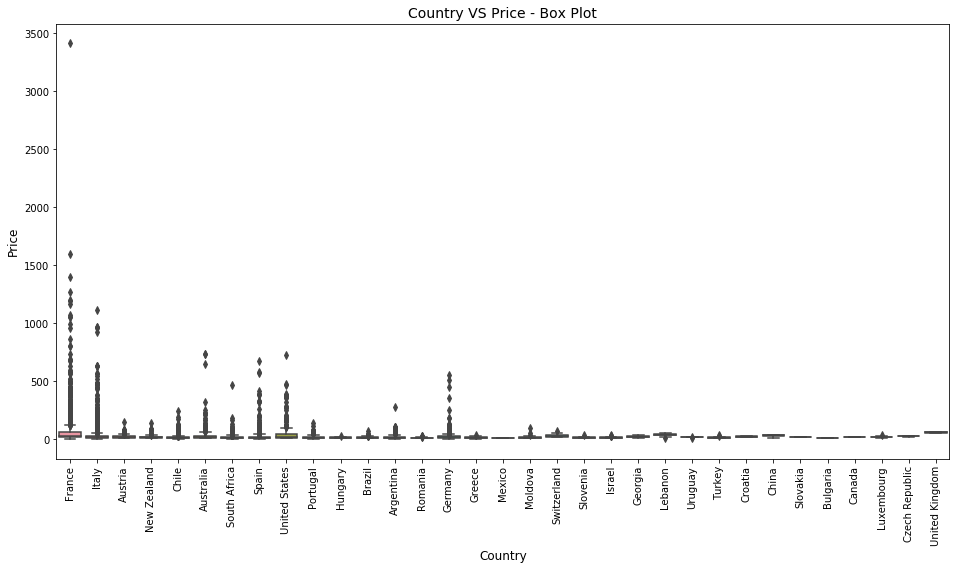

In [95]:
# let's check for relationships between "Country" and "Price"
plt.figure(figsize=(16,8))
sns.boxplot(x='Country', y='Price', data=wine_data)
plt.title('Country VS Price - Box Plot', fontsize=14)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.show()

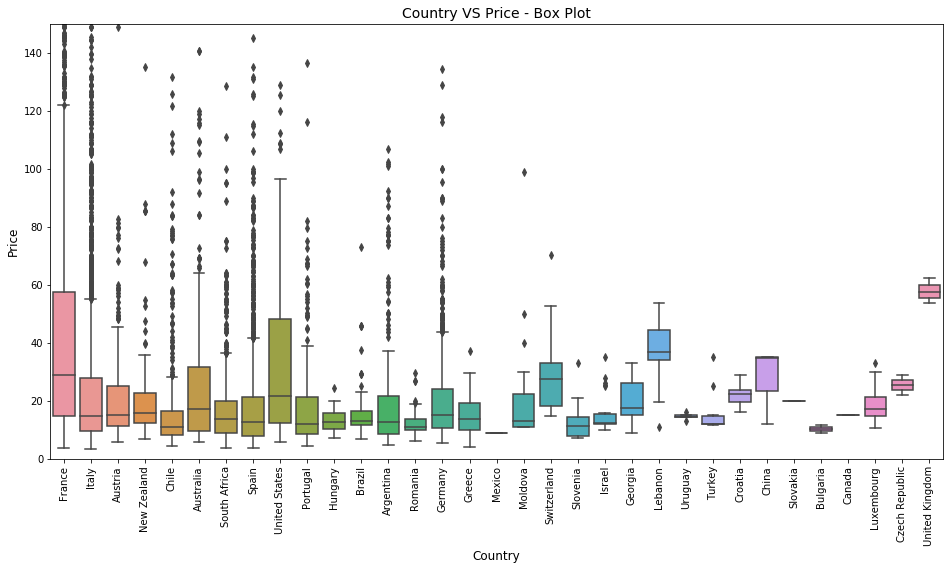

In [96]:
# let's zoom in
plt.figure(figsize=(16,8))
sns.boxplot(x='Country', y='Price', data=wine_data)
plt.title('Country VS Price - Box Plot', fontsize=14)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,150)
plt.show()

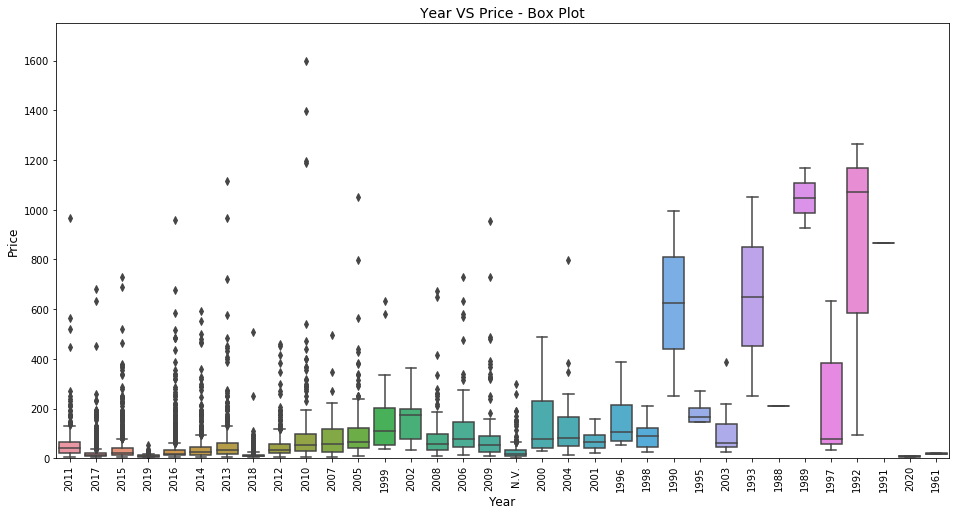

In [97]:
# let's check for relationships between "Year" and "Price"
plt.figure(figsize=(16,8))
sns.boxplot(x='Year', y='Price', data=wine_data)
plt.title('Year VS Price - Box Plot', fontsize=14)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,1750)
plt.show()

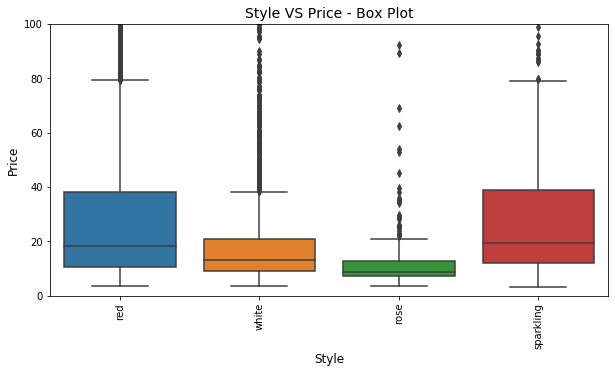

In [98]:
# let's check for relationships between "Style" and "Price"
plt.figure(figsize=(10,5))
sns.boxplot(x='Style', y='Price', data=wine_data)
plt.title('Style VS Price - Box Plot', fontsize=14)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Style', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.show()

It seems there's some overlapping between categories for both "Country" and "Style" attributes, in relation to the "Price" variable.  
The "Year" attribute might have a bigger impact in explaining the Price variable.  
Let's visualize box-plots, using different attribute categorization (as well as we did for the Rating variable), and then let's validate our assumptions using the ANOVA technique.

######  Country & Year New categories - frequency-based.

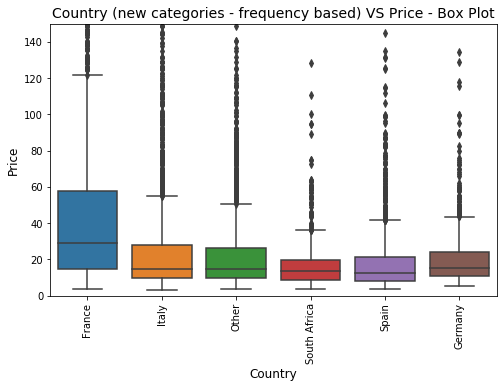

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Country', y='Price', data=copy_winedata)
plt.title('Country (new categories - frequency based) VS Price - Box Plot', fontsize=14)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,150)
plt.show()

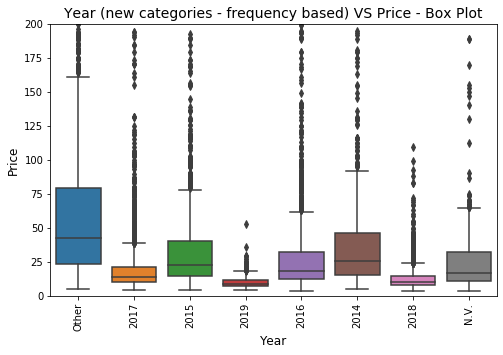

In [100]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Year', y='Price', data=copy_winedata)
plt.title('Year (new categories - frequency based) VS Price - Box Plot', fontsize=14)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,200)
plt.show()

Again, the overlapping between "Country" categories, in relation to "Price" variable, is still evident, which suggests a very low impact of the feature in explaining the wine price.  
The relationship between "Year" and "Price" seem to be stronger.

##### Country & Year New categories - Continents and Time Periods

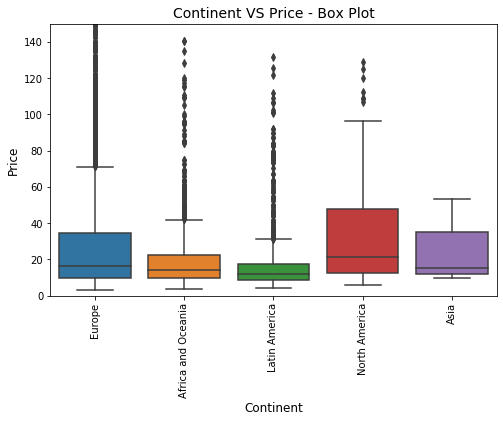

In [101]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Country', y='Price', data=copy_1_winedata)
plt.title('Continent VS Price - Box Plot', fontsize=14)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,150)
plt.show()

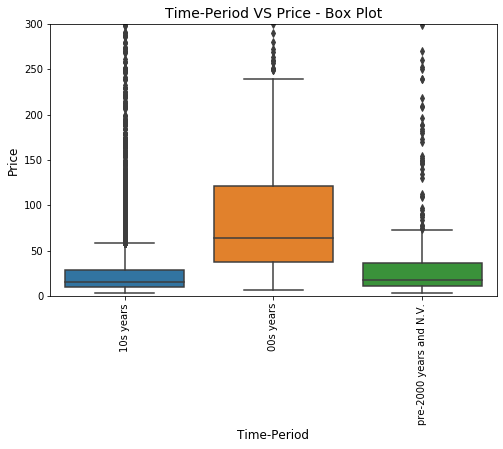

In [102]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Year', y='Price', data=copy_1_winedata)
plt.title('Time-Period VS Price - Box Plot', fontsize=14)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time-Period', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,300)
plt.show()

As well as per the "Rating" variable, any relationships between "Country" and "Price" still fail to appear.  
The 00s decade wines seem to have, overall, a higher price than the other time-periods, although the overlapping of the other 2 categories (time-periods) is evident.  
Let's use the **Analysis of Variance - ANOVA** - method to compare the attribute's impact, and validate our assumptions.

##### ANOVA - Analysis of Variance. Target : Price.

In [103]:
# ANOVA - Target Variable: Price 
country = wine_data.groupby(['Country'])
price_f_score_country, price_p_value_country = stats.f_oneway(country.get_group(country_list[0])['Price'],
                                           country.get_group(country_list[1])['Price'],
                                           country.get_group(country_list[2])['Price'],
                                           country.get_group(country_list[3])['Price'],
                                           country.get_group(country_list[4])['Price'],
                                           country.get_group(country_list[5])['Price'],
                                           country.get_group(country_list[6])['Price'],
                                           country.get_group(country_list[7])['Price'],
                                           country.get_group(country_list[8])['Price'],
                                           country.get_group(country_list[9])['Price'],
                                           country.get_group(country_list[10])['Price'],
                                           country.get_group(country_list[11])['Price'],
                                           country.get_group(country_list[12])['Price'],
                                           country.get_group(country_list[13])['Price'],
                                           country.get_group(country_list[14])['Price'],
                                           country.get_group(country_list[15])['Price'],
                                           country.get_group(country_list[16])['Price'],
                                           country.get_group(country_list[17])['Price'],
                                           country.get_group(country_list[18])['Price'],
                                           country.get_group(country_list[19])['Price'],
                                           country.get_group(country_list[20])['Price'],
                                           country.get_group(country_list[21])['Price'],
                                           country.get_group(country_list[22])['Price'],
                                           country.get_group(country_list[23])['Price'],
                                           country.get_group(country_list[24])['Price'],
                                           country.get_group(country_list[25])['Price'],
                                           country.get_group(country_list[26])['Price'],
                                           country.get_group(country_list[27])['Price'],
                                           country.get_group(country_list[28])['Price'],
                                           country.get_group(country_list[29])['Price'],
                                           country.get_group(country_list[30])['Price'],
                                           country.get_group(country_list[31])['Price'],
                                           country.get_group(country_list[32])['Price'])
    
print(price_f_score_country, price_p_value_country)

17.782154656695834 2.395932050958505e-97


In [104]:
year = wine_data.groupby(['Year'])
price_f_score_year, price_p_value_year = stats.f_oneway(year.get_group(year_list[0])['Price'],
                                           year.get_group(year_list[1])['Price'],
                                           year.get_group(year_list[2])['Price'],
                                           year.get_group(year_list[3])['Price'],
                                           year.get_group(year_list[4])['Price'],
                                           year.get_group(year_list[5])['Price'],
                                           year.get_group(year_list[6])['Price'],
                                           year.get_group(year_list[7])['Price'],
                                           year.get_group(year_list[8])['Price'],
                                           year.get_group(year_list[9])['Price'],
                                           year.get_group(year_list[10])['Price'],
                                           year.get_group(year_list[11])['Price'],
                                           year.get_group(year_list[12])['Price'],
                                           year.get_group(year_list[13])['Price'],
                                           year.get_group(year_list[14])['Price'],
                                           year.get_group(year_list[15])['Price'],
                                           year.get_group(year_list[16])['Price'],
                                           year.get_group(year_list[17])['Price'],
                                           year.get_group(year_list[18])['Price'],
                                           year.get_group(year_list[19])['Price'],
                                           year.get_group(year_list[20])['Price'],
                                           year.get_group(year_list[21])['Price'],
                                           year.get_group(year_list[22])['Price'],
                                           year.get_group(year_list[23])['Price'],
                                           year.get_group(year_list[24])['Price'],
                                           year.get_group(year_list[25])['Price'],
                                           year.get_group(year_list[26])['Price'],
                                           year.get_group(year_list[27])['Price'],
                                           year.get_group(year_list[28])['Price'],
                                           year.get_group(year_list[29])['Price'],
                                           year.get_group(year_list[30])['Price'],
                                           year.get_group(year_list[31])['Price'],
                                           year.get_group(year_list[32])['Price'],
                                           year.get_group(year_list[33])['Price'])
    
print(price_f_score_year, price_p_value_year)

110.05559061865937 0.0


In [105]:
style = wine_data.groupby(['Style'])
price_f_score_style, price_p_value_style = stats.f_oneway(style.get_group(style_list[0])['Price'],
                                           style.get_group(style_list[1])['Price'],
                                           style.get_group(style_list[2])['Price'],
                                           style.get_group(style_list[3])['Price'])
print(price_f_score_style, price_p_value_style)

72.28786827198152 2.2018224088468116e-46


In [106]:
country_1 = copy_winedata.groupby(['Country'])
price_f_score_country_1, price_p_value_country_1 = stats.f_oneway(country_1.get_group('Italy')['Price'],
                                                                country_1.get_group('France')['Price'],
                                                                country_1.get_group('Spain')['Price'],
                                                                country_1.get_group('Germany')['Price'],
                                                                country_1.get_group('South Africa')['Price'],
                                                                country_1.get_group('Other')['Price'])
print(price_f_score_country_1, price_p_value_country_1)

100.9341746196849 6.660010788574645e-105


In [107]:
year_1 = copy_winedata.groupby(['Year'])
price_f_score_year_1, price_p_value_year_1 = stats.f_oneway(year_1.get_group('2014')['Price'],
                                                            year_1.get_group('2015')['Price'],
                                                            year_1.get_group('2016')['Price'],
                                                            year_1.get_group('2017')['Price'],
                                                            year_1.get_group('2018')['Price'],
                                                            year_1.get_group('2019')['Price'],
                                                            year_1.get_group('N.V.')['Price'],
                                                            year_1.get_group('Other')['Price'])

print(price_f_score_year_1, price_p_value_year_1)

228.0411373882308 3.8e-322


In [108]:
price_f_score_continent, price_p_value_continent = stats.f_oneway(continent.get_group('Europe')['Price'],
                                                                  continent.get_group('Africa and Oceania')['Price'],
                                                                  continent.get_group('Latin America')['Price'],
                                                                  continent.get_group('North America')['Price'],
                                                                  continent.get_group('Asia')['Price'])

print(price_f_score_continent, price_p_value_continent)

18.588838381147585 2.9973655200987978e-15


In [109]:
price_f_score_decade, price_p_value_decade = stats.f_oneway(decade.get_group('pre-2000 years and N.V.')['Price'],
                                                decade.get_group('00s years')['Price'],
                                                decade.get_group('10s years')['Price'])

print(price_f_score_decade, price_p_value_decade)

370.4602594697162 1.8755801943333432e-157


In [110]:
price_fscore =  {'Country - Original Categories':round(price_f_score_country,2),\
                 'Country - New Categories (freq-based)':round(price_f_score_country_1,2),\
                 'Continent':round(price_f_score_continent,2),\
                 'Year - Original Categories':round(price_f_score_year,2),\
                 'Year - New Categories (freq-based)':round(price_f_score_year_1,2),\
                 'Time Period':round(price_f_score_decade,2),\
                 'Wine Style':round(price_f_score_style,2)}

print('Dictionary with features and F-test scores - Target Variable: "Price":')
price_fscore

Dictionary with features and F-test scores - Target Variable: "Price":


{'Country - Original Categories': 17.78,
 'Country - New Categories (freq-based)': 100.93,
 'Continent': 18.59,
 'Year - Original Categories': 110.06,
 'Year - New Categories (freq-based)': 228.04,
 'Time Period': 370.46,
 'Wine Style': 72.29}

The F-test scores, by ANOVA, confirmed that Country and Style have the least impact on the wine Price.  
**Again, grouping the Years into time-periods proved to be the most impactful feature transformation on the Price variable.**

___

##### Uncovering correlations, patterns, and relationships between numeric-type variables.

Pair-Scatter plots of Numeric Type variables - Data Not Transformed


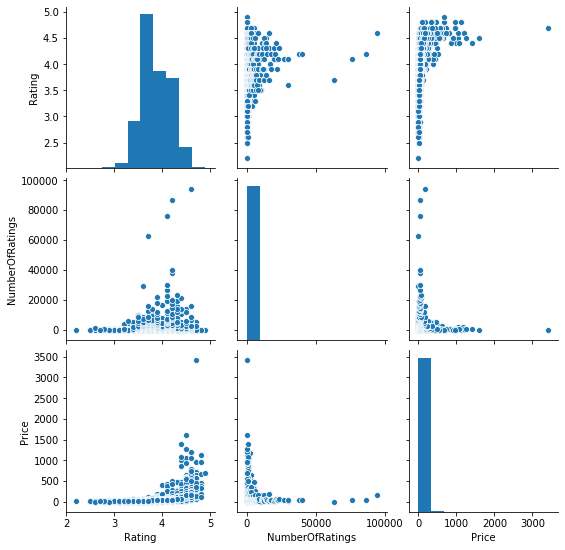

In [111]:
# Let's check for correlations between numeric-types attributes
print('Pair-Scatter plots of Numeric Type variables - Data Not Transformed')
sns.pairplot(wine_data)
plt.show()

In [112]:
# Let's check data distribution skeweness
print('Data distribution skeweness score:')
wine_data[['Rating', 'Price', 'NumberOfRatings']].skew()

Data distribution skeweness score:


Rating              0.007989
Price              14.961501
NumberOfRatings    29.056535
dtype: float64

Insights:
* Price and Number-of-Ratings data distribution is very right-skewed (high positive skeweness score).
* Rating distribution is almost normal (very low skewness score). 
* No linear correlations between any of the features.
* There might be a potential curvi-linear relationships between the following variables:
  * Rating and Price
  * Rating - Number of Ratings
  * Price - Number of Ratings

As observed, no linear correlation is visible between the variables. Let's validate the absence of linear correlations by calculating the Pearson Correlation coefficients.

In [113]:
corr_nr = stats.pearsonr(wine_data['NumberOfRatings'], wine_data['Rating'])
corr_pr = stats.pearsonr(wine_data['Price'], wine_data['Rating'])
corr_np = stats.pearsonr(wine_data['NumberOfRatings'], wine_data['Price'])

pearson_correlation =  {'Number of Ratings VS Rating':round(corr_nr[0],2),\
                        'Price VS Rating':round(corr_pr[0],2),\
                        'Number of Ratings VS Price':round(corr_np[0],2)}
                        
print('Dictionary with Pearson Correlation Coefficients:')
pearson_correlation

Dictionary with Pearson Correlation Coefficients:


{'Number of Ratings VS Rating': 0.07,
 'Price VS Rating': 0.45,
 'Number of Ratings VS Price': 0.02}

**The Pearson Correlation Coefficients confirmed that variables are no linearly correlated.** 

___

#### Data not transformed VS data log transformed

In [114]:
from scipy.optimize import curve_fit
from pandas import get_dummies
from sklearn.preprocessing import RobustScaler
print('Needed libraries successfully imported.')

Needed libraries successfully imported.


The "Rating" variable has an almost Normal distribution, whilst "Price" and "NumberOfRatings" have very right-skewed distributions.  
Let's use the logarithimc transformation on the variables, and check again distributions, possible correlations/relationships, and skeweness score.

Pair-Scatter plots of Numeric-Type variables - After Log Transformation


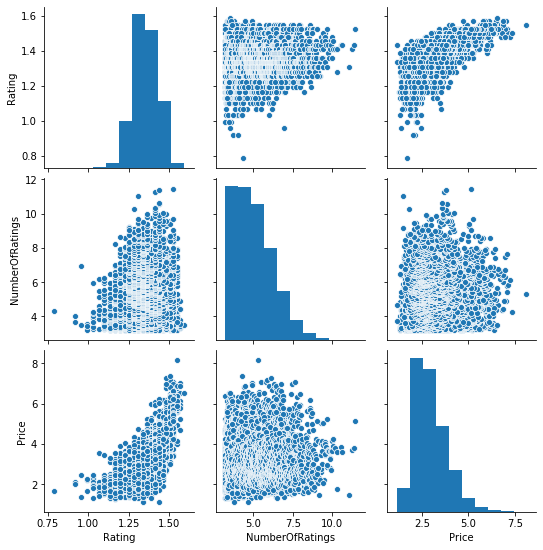

In [115]:
wine_log = wine_data.copy(deep=True)
wine_log['Rating'] = np.log(wine_log['Rating'])
wine_log['Price'] = np.log(wine_log['Price'])
wine_log['NumberOfRatings'] = np.log(wine_log['NumberOfRatings'])

print('Pair-Scatter plots of Numeric-Type variables - After Log Transformation')
sns.pairplot(wine_log)
plt.show()

In [116]:
# Let's check data distribution skeweness
print('Data distribution skeweness score (after log-transform):')
wine_log[['Rating', 'Price', 'NumberOfRatings']].skew()

Data distribution skeweness score (after log-transform):


Rating            -0.265821
Price              1.039141
NumberOfRatings    0.748350
dtype: float64

After the Log Transformation, Price and NumberOfRatings distribution is "more normal", however Price distribution is still quite right-skewed. Rating distribution is more left-skewed than before the log transformation, but still quite "normal".  

"Rating" and "Price" variables seem to be more linearly correlated, but I fail to see any other improvement in the linear correlation of the other variables.

In [117]:
log_corr_nr = stats.pearsonr(wine_log['NumberOfRatings'], wine_log['Rating'])
log_corr_pr = stats.pearsonr(wine_log['Price'], wine_log['Rating'])
log_corr_np = stats.pearsonr(wine_log['NumberOfRatings'], wine_log['Price'])

log_pearson_correlation =  {'Number of Ratings VS Rating':round(log_corr_nr[0],2),\
                            'Price VS Rating':round(log_corr_pr[0],2),\
                            'Number of Ratings VS Price':round(log_corr_np[0],2)}
                        
print('Dictionary with Pearson Correlation Coefficients - After Log Transformation:')
log_pearson_correlation

Dictionary with Pearson Correlation Coefficients - After Log Transformation:


{'Number of Ratings VS Rating': 0.12,
 'Price VS Rating': 0.72,
 'Number of Ratings VS Price': 0.07}

##### Rating as a function  of Price

As already observed, between "Rating" and "Price" there might be a curvi-linear relationships, seemingly a logarithmic one. Let's plot "Rating" as a function of "Price", both before and after the logarithmic transformation.

Rating VS Price - Scatter Plots


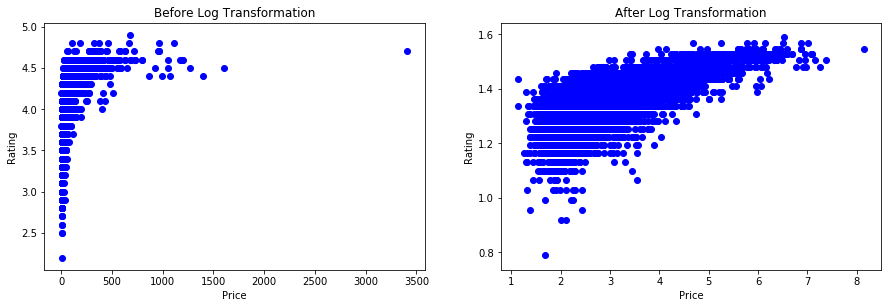

In [118]:
# Let's create a function to plot both scatter plots of variables before and after log transform
def scatter_plots(original_dataset, log_dataset, attribute_x, attribute_y,\
                  title_1='Before Log Transformation', xlim_1=None, xlim_2=None, ylim_1=None, ylim_2=None,\
                  title_2='After Log Transformation', xlimlog_1=None, xlimlog_2=None, ylimlog_1=None, ylimlog_2=None):
    
    fig = plt.figure(figsize=(15,10))
    plot_original = fig.add_subplot(2,2,1)
    plot_log = fig.add_subplot(2,2,2)
    
    plot_original.scatter(original_dataset[attribute_x], original_dataset[attribute_y], c='blue')
    plot_original.set_title(title_1)
    plot_original.set_ylabel(attribute_y)
    plot_original.set_xlabel(attribute_x)
    plot_original.set_xlim(xlim_1, xlim_2)
    plot_original.set_ylim(ylim_1, ylim_2)

    plot_log.scatter(log_dataset[attribute_x], log_dataset[attribute_y], c='blue')
    plot_log.set_title(title_2)
    plot_log.set_ylabel(attribute_y)
    plot_log.set_xlabel(attribute_x)
    plot_original.set_xlim(xlimlog_1, xlimlog_2)
    plot_original.set_ylim(ylimlog_1, ylimlog_2)
    
    print('{} VS {} - Scatter Plots'.format(attribute_y, attribute_x))
    plt.show()
    

scatter_plots(wine_data, wine_log, 'Price', 'Rating')

We have 1 aberration (extreme outlier) on the price variable, before the Log Transformation. Let's plot the scatter graphs again, zooming in on the original data in order not to see the outlier anymore, and don't let our analysis be biased by a single outlier.  

Rating VS Price - Scatter Plots


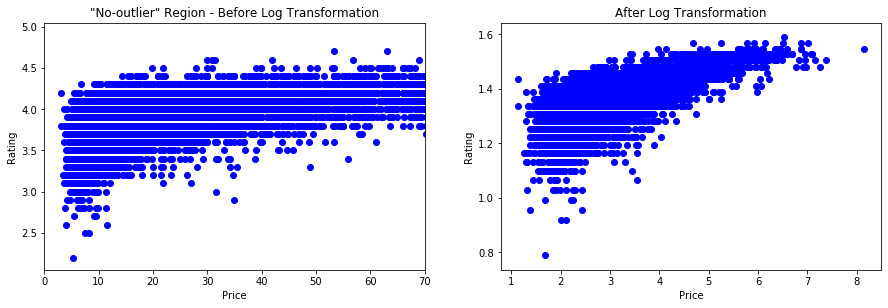

In [119]:
scatter_plots(wine_data, wine_log, 'Price', 'Rating', xlim_1=0, xlim_2=70,\
              title_1='"No-outlier" Region - Before Log Transformation')

Let's plot now the scatter plots, again, with a curve line able to fit the distribution. Considering the data distribution of the scatter plots, I'll try with a **logarithmic function**.

In [120]:
# Let's define a logarithimc function
def log_function(x, beta_1, beta_2): 
    y = beta_1 + beta_2 * np.log(x)
    return y

# Let's find the best parameters for our fitted curve (data before log transformation)
popt, pcov =curve_fit(log_function, wine_data['Price'], wine_data['Rating'])
print(popt)

[3.13125181 0.24831222]


In [121]:
# Let's find the best parameters for our fitted curve (data after log transform)
popt_log, pcov_log =curve_fit(log_function, wine_log['Price'], wine_log['Rating'])
print(popt_log)

[1.14243799 0.19809485]


Rating VS Price - Scatter Plots with Fitted Curves


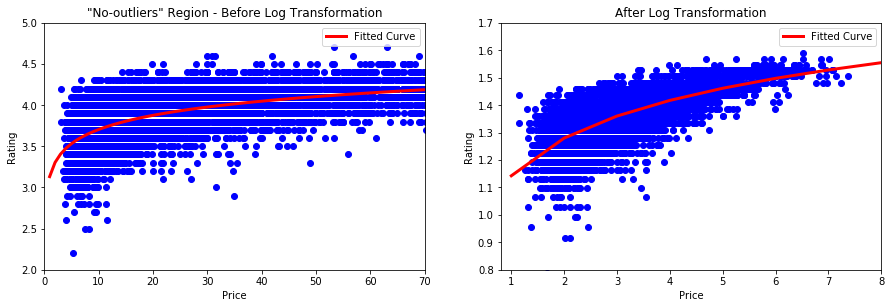

In [122]:
# Let's create a function to plot scatter plots with fitted curves/line
def curve_plots(x, y_beforelog, y_afterlog, original_dataset, log_dataset, attribute_x, attribute_y,\
                title_1='Before Log Transformation', xlim_1=None, xlim_2=None, ylim_1=None, ylim_2=None,\
                title_2='After Log Transformation', xlimlog_1=None, xlimlog_2=None, ylimlog_1=None, ylimlog_2=None):
    
    fig = plt.figure(figsize=(15,10))
    plot_original = fig.add_subplot(2,2,1)
    plot_log = fig.add_subplot(2,2,2)
    
    plot_original.scatter(original_dataset[attribute_x], original_dataset[attribute_y], c='blue')
    plot_original.plot(x, y_beforelog, c='red', label="Fitted Curve", lw=3)
    plot_original.legend(loc='best')
    plot_original.set_title(title_1)
    plot_original.set_ylabel(attribute_y)
    plot_original.set_xlabel(attribute_x)
    plot_original.set_xlim(xlim_1, xlim_2)
    plot_original.set_ylim(ylim_1, ylim_2)

    plot_log.scatter(log_dataset[attribute_x], log_dataset[attribute_y], c='blue')
    plot_log.plot(x, y_afterlog, c='red', label="Fitted Curve", lw=3)
    plot_log.legend(loc='best')
    plot_log.set_title(title_2)
    plot_log.set_ylabel(attribute_y)
    plot_log.set_xlabel(attribute_x)
    plot_log.set_xlim(xlimlog_1, xlimlog_2)
    plot_log.set_ylim(ylimlog_1, ylimlog_2)
    
    print('{} VS {} - Scatter Plots with Fitted Curves'.format(attribute_y, attribute_x))    
    plt.show()
    
x=range(1,3501,1)
curve_plots(x=x, y_beforelog=popt[0] + popt[1]*np.log(x), y_afterlog=popt_log[0] + popt_log[1] * np.log(x),\
            original_dataset=wine_data, log_dataset=wine_log, attribute_x='Price', attribute_y='Rating',\
            title_1='"No-outliers" Region - Before Log Transformation', xlim_1=0, xlim_2=70, ylim_1=2, ylim_2=5,\
            xlimlog_1=0.8, xlimlog_2=8, ylimlog_1=0.8, ylimlog_2=1.7)

Rating VS Price - Scatter Plots with Fitted Curves


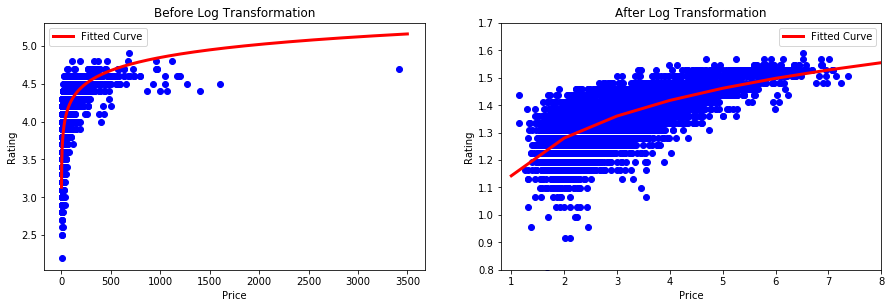

In [123]:
# Now, let's visualize the scatter plots with the fitted curves without zooming in (outliers included)
curve_plots(x=range(1,3501,1), y_beforelog=popt[0] + popt[1]*np.log(x), y_afterlog=popt_log[0] + popt_log[1] * np.log(x),\
            original_dataset=wine_data, log_dataset=wine_log, attribute_x='Price', attribute_y='Rating', xlimlog_1=0.8,\
            xlimlog_2=8, ylimlog_1=0.8, ylimlog_2=1.7)

After log transformation, Rating and Price variables also show a linear tendency. Let's create a scatter plot with a regression line to better visualize a possible linear correlation.

Rating VS Price - Scatter plot with Regression Line


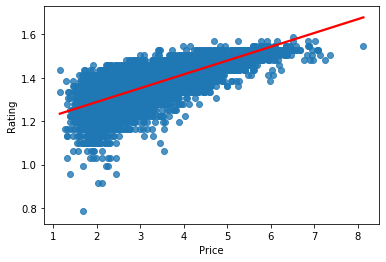

In [124]:
# Regression Scatter plot
print('Rating VS Price - Scatter plot with Regression Line')
sns.regplot(x='Price', y='Rating', data=wine_log, line_kws={"color": "red"})
plt.show()

Insights:
* Rating and Price relationship seem to be logarithmic (curvi-linear).
* After log transformation, a linear correlation between the variables is also possible.

##### Price as a function of Rating

Let's plot, now, Price as a function of Rating, (both before and after the logarithmic transformation), and check for linear or curvi-linear relationships.

Price VS Rating - Scatter Plots


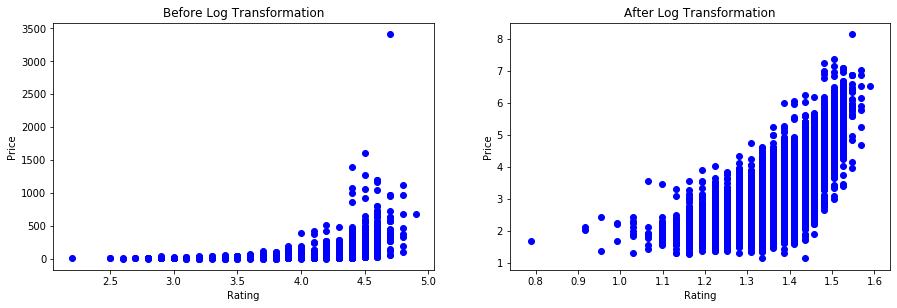

In [125]:
scatter_plots(wine_data, wine_log, 'Rating', 'Price')

Let's zoom in the no-outlier region (before log-transform).

Price VS Rating - Scatter Plots


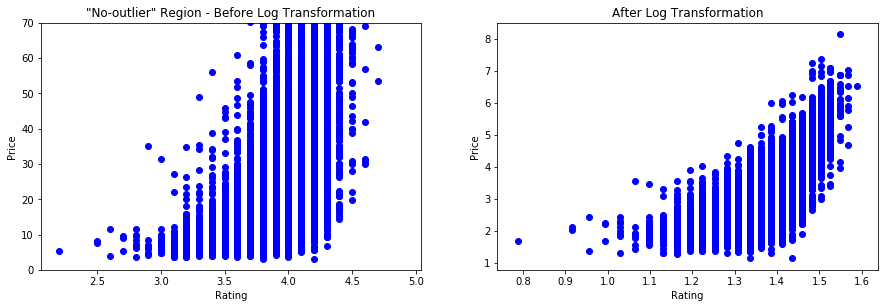

In [126]:
scatter_plots(wine_data, wine_log, 'Rating','Price', ylim_1=0, ylim_2=70,\
              title_1='"No-outlier" Region - Before Log Transformation')

It seems an exponential function could fit the data distribution.

In [127]:
# Let's define an exponential function
def exp_function(x, beta_1, beta_2):
    y = beta_1 + beta_2 * np.exp(x)
    return y

# Let's find the best parameters for our fitted curve - original data
popt_exp, pcov_exp =curve_fit(exp_function, wine_data['Rating'], wine_data['Price'])
print(popt_exp)

[-90.3929199    2.47420902]


In [128]:
# Let's find the best parameters for our fitted curve - log transform
poptlog_exp, pcovlog_exp =curve_fit(exp_function, wine_log['Rating'], wine_log['Price'])
print(poptlog_exp)

[-5.49430191  2.186409  ]


Price VS Rating - Scatter Plots with Fitted Curves


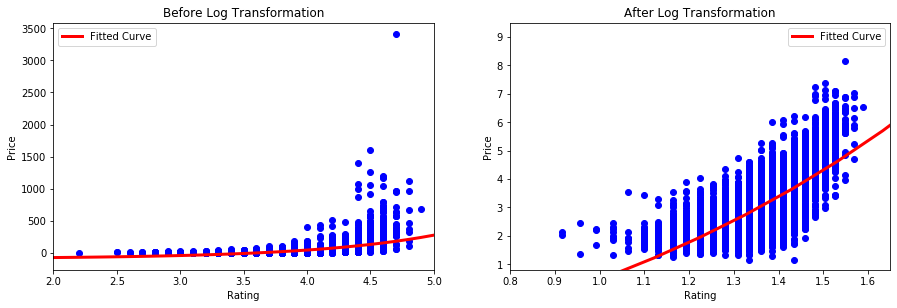

In [129]:
# Let's visualize the scatter plots with the fitted curves
x = np.linspace(0,5,50)
yexp = popt_exp[0] + popt_exp[1] * np.exp(x)
yexp_log = poptlog_exp[0] + poptlog_exp[1] * np.exp(x)

curve_plots(x=x, y_beforelog=yexp, y_afterlog=yexp_log, original_dataset=wine_data, log_dataset=wine_log,\
            attribute_x='Rating', attribute_y='Price', xlim_1=2, xlim_2=5, xlimlog_1=0.8, xlimlog_2=1.65,\
            ylimlog_1=0.8, ylimlog_2=9.5)

Let's focus on the non-outlier region.

Fitted curve: exponential function
Price VS Rating - Scatter Plots with Fitted Curves


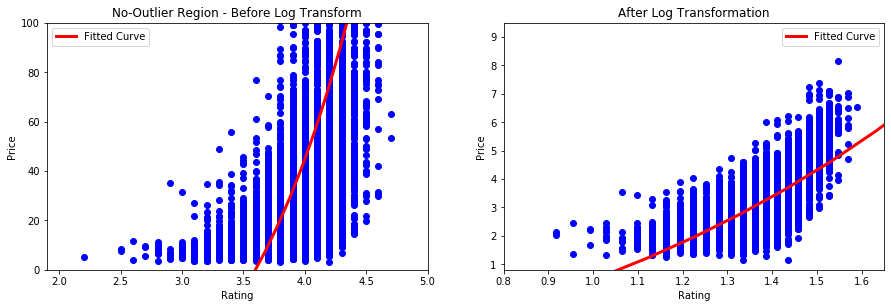

In [130]:
print('Fitted curve: exponential function')
curve_plots(x=x, y_beforelog=yexp, y_afterlog=yexp_log, original_dataset=wine_data, log_dataset=wine_log,\
            attribute_x='Rating', attribute_y='Price', xlim_1=1.9, xlim_2=5, ylim_1=0, ylim_2=100,\
            xlimlog_1=0.8, xlimlog_2=1.65, ylimlog_1=0.8, ylimlog_2=9.5, title_1='No-Outlier Region - Before Log Transform')

Let's try with a polynomial transformation (from 2nd to 8th degree)

In [131]:
poly_beforelog = np.polyfit(wine_data['Rating'], wine_data['Price'],2)
polyfunc_beforelog = np.poly1d(poly_beforelog)
print(polyfunc_beforelog)

       2
206.1 x - 1486 x + 2679


In [132]:
poly_afterlog = np.polyfit(wine_log['Rating'], wine_log['Price'],2)
polyfunc_afterlog = np.poly1d(poly_afterlog)
print(polyfunc_afterlog)

       2
25.13 x - 59.09 x + 36.78


Price VS Rating - Scatter Plots with Fitted Curves


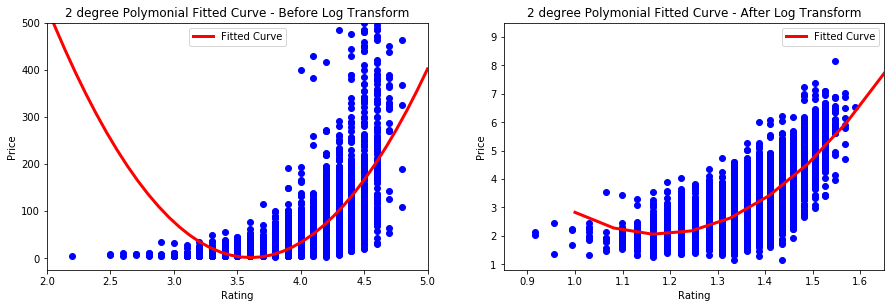

In [133]:
# Let's define a function for plotting scatters with polynomial fitted curves
def pricevsrating_polycurves(degree):
    x = np.linspace(1,5,50)
    poly_beforelog = np.polyfit(wine_data['Rating'], wine_data['Price'],degree)
    polyfunc_beforelog = np.poly1d(poly_beforelog)
    poly_afterlog = np.polyfit(wine_log['Rating'], wine_log['Price'],degree)
    polyfunc_afterlog = np.poly1d(poly_afterlog)

    poly_1 = polyfunc_beforelog[0] + polyfunc_beforelog[1]*(x) + polyfunc_beforelog[2]*(x**2)\
    + polyfunc_beforelog[3]*(x**3) + polyfunc_beforelog[4]*(x**4) + polyfunc_beforelog[5]*(x**5) + polyfunc_beforelog[6]*(x**6)\
    + polyfunc_beforelog[7]*(x**7) + polyfunc_beforelog[8]*(x**8)

    poly_2 = polyfunc_afterlog[0] + polyfunc_afterlog[1]*(x) + polyfunc_afterlog[2]*(x**2) + polyfunc_afterlog[3]*(x**3)\
    + polyfunc_afterlog[4]*(x**4) + polyfunc_afterlog[5]*(x**5) + polyfunc_afterlog[6]*(x**6) + polyfunc_afterlog[7]*(x**7)\
    + polyfunc_afterlog[8]*(x**8)

    curve_plots(x=x, y_beforelog=poly_1, y_afterlog=poly_2, original_dataset=wine_data, log_dataset=wine_log,\
                attribute_x='Rating', attribute_y='Price', xlim_1=2, xlim_2=5, ylim_1=-25, ylim_2=500,
                xlimlog_1=0.85, xlimlog_2=1.65, ylimlog_1=0.8, ylimlog_2=9.5,\
                title_1 = '{} degree Polymonial Fitted Curve - Before Log Transform'.format(degree),
                title_2 = '{} degree Polymonial Fitted Curve - After Log Transform'.format(degree))

# 2nd degree
pricevsrating_polycurves(2)

Price VS Rating - Scatter Plots with Fitted Curves


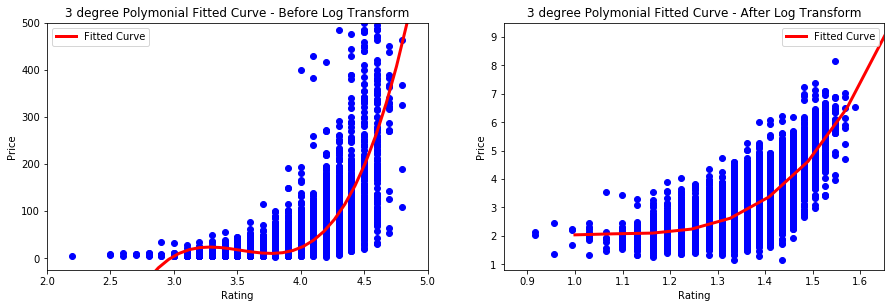

In [134]:
# 3rd degree
pricevsrating_polycurves(3)

Price VS Rating - Scatter Plots with Fitted Curves


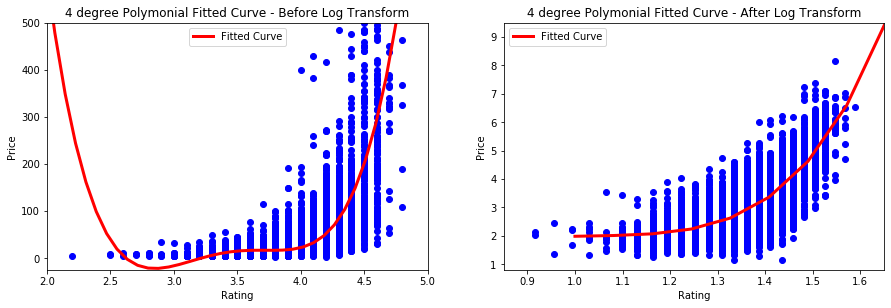

In [135]:
# 4th degree
pricevsrating_polycurves(4)

Price VS Rating - Scatter Plots with Fitted Curves


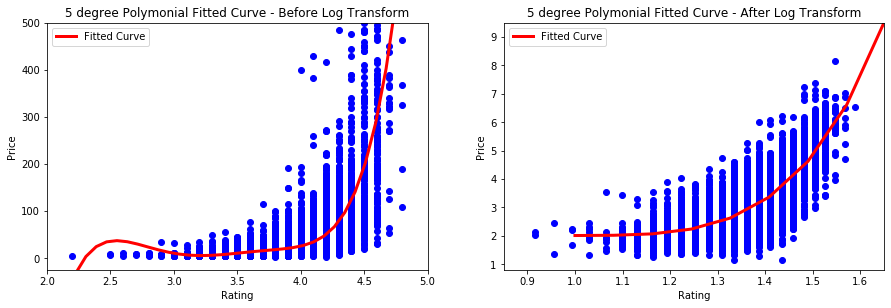

In [136]:
# 5th degree
pricevsrating_polycurves(5)

Price VS Rating - Scatter Plots with Fitted Curves


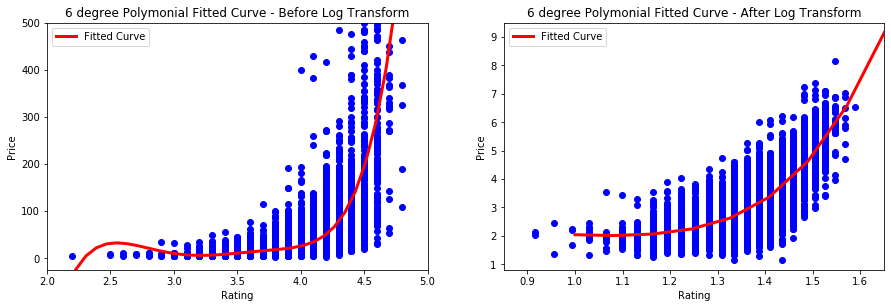

In [137]:
# 6th degree
pricevsrating_polycurves(6)

Price VS Rating - Scatter Plots with Fitted Curves


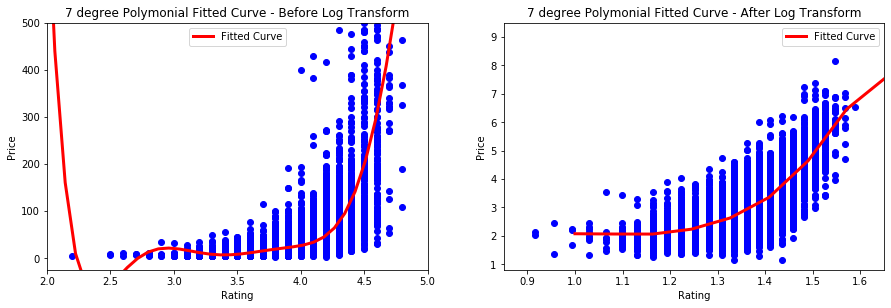

In [138]:
# 7th degree
pricevsrating_polycurves(7)

Price VS Rating - Scatter Plots with Fitted Curves


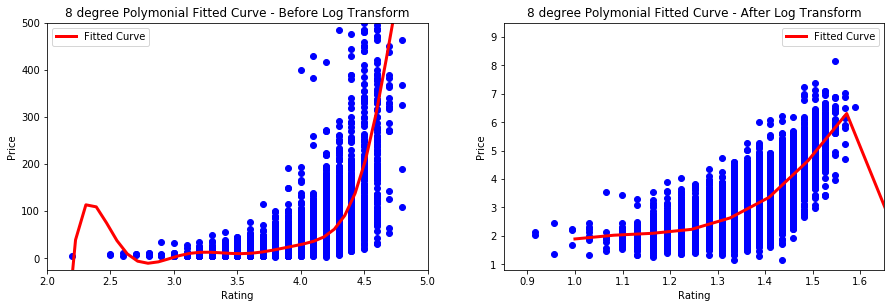

In [139]:
# 8th degree
pricevsrating_polycurves(8)

We've already observed that, after log transformation, Rating and Price variables show a linear tendency as well. Let's visualize again the scatter plot with regression line for Price as a function of rating.

Price VS Rating - Scatter plot with Regression Line


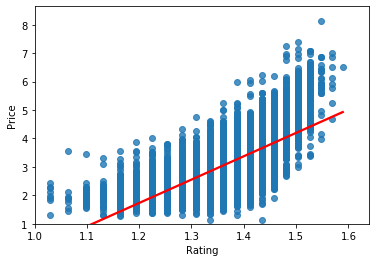

In [140]:
# Regression Scatter plot
print('Price VS Rating - Scatter plot with Regression Line')
sns.regplot(x='Rating', y='Price', data=wine_log, line_kws={"color": "red"})
plt.ylim(1)
plt.xlim(1)
plt.show()

Insights:
* A polynomial curve seem to be the best regression model to represent the relationship of Price as a function of Rating.
* After the 8th degree polynomial, signs of overfitting started to show.
* Overall, data after the log transformation is better represented/explained, either by an exponential or polynomial function, than data before the log transformation.
* After log transformation, a linear correlation between the variables is also possible.

##### Rating as a function of Number_of_Ratings

Let's explore possible relationships between the Rating score and the number of Ratings, and, if any, how the Number of Ratings affect the Rating itself. 

Rating VS NumberOfRatings - Scatter Plots


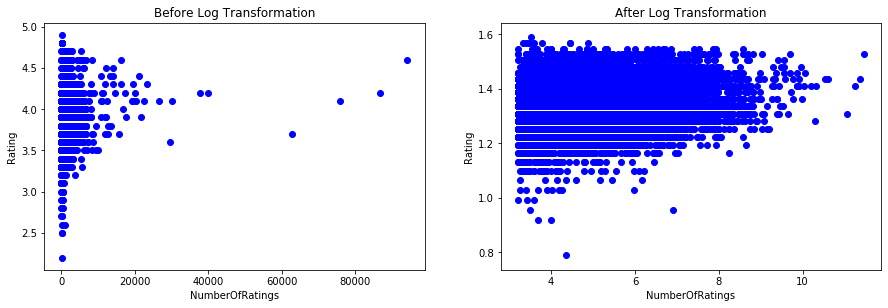

In [141]:
scatter_plots(wine_data, wine_log, 'NumberOfRatings','Rating')

Again, in the data before the Logarithimic Transforamtion, we have some extreme outliers that could bias our analysis. Let's zoom in to exclude the outliers from the plot.

Rating VS NumberOfRatings - Scatter Plots


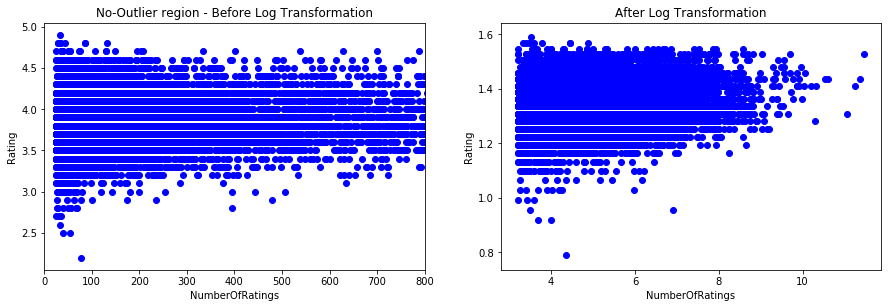

In [142]:
scatter_plots(wine_data, wine_log, 'NumberOfRatings','Rating', xlim_1=0, xlim_2=800,\
              title_1='No-Outlier region - Before Log Transformation')

It seems there is no relationship between the variables, before the log transform. After log transformation, a logarithmic relationship may be possible.

Rating VS NumberOfRatings - Scatter Plots with Fitted Curves


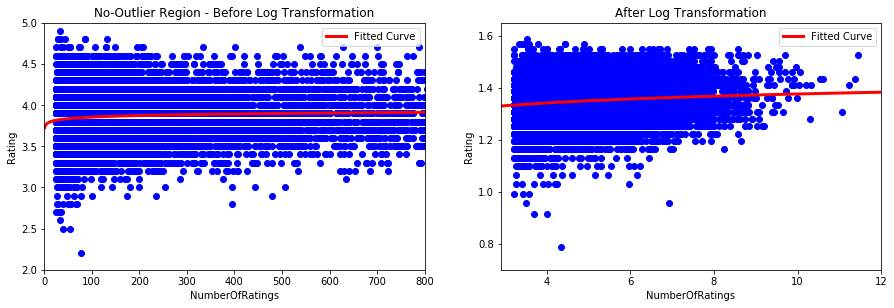

In [143]:
# Let's find the best parameters for our fitted curve (data before log transformation)
popt_nolog, pcov_nolog =curve_fit(log_function, wine_data['NumberOfRatings'], wine_data['Rating']) 
# Let's find the best parameters for our fitted curve (data after log transform)
popt_log, pcov_log =curve_fit(log_function, wine_log['NumberOfRatings'], wine_log['Rating'])
x = range(1,95000,1)

curve_plots(x=x, y_beforelog=popt_nolog[0] + popt_nolog[1]*np.log(x),
            y_afterlog=popt_log[0] + popt_log[1]*np.log(x),
            original_dataset=wine_data, log_dataset=wine_log, attribute_x='NumberOfRatings', attribute_y='Rating',
            title_1='No-Outlier Region - Before Log Transformation', xlim_1=0, xlim_2=800, ylim_1=2, ylim_2=5,
            xlimlog_1=2.9, xlimlog_2=12, ylimlog_1=0.7, ylimlog_2=1.65)

Rating VS NumberOfRatings - Scatter Plots with Fitted Curves


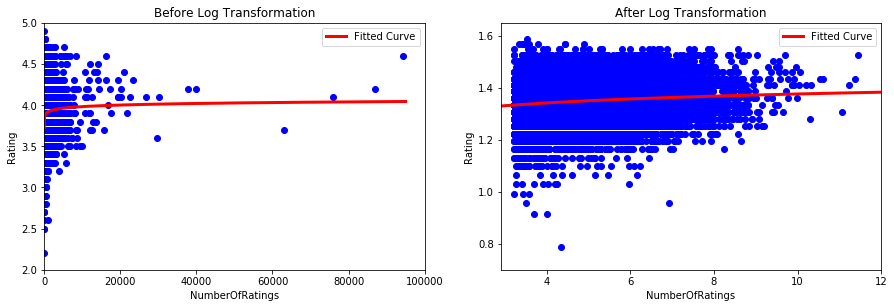

In [144]:
curve_plots(x=x, y_beforelog=popt_nolog[0] + popt_nolog[1]*np.log(x),
            y_afterlog=popt_log[0] + popt_log[1]*np.log(x),
            original_dataset=wine_data, log_dataset=wine_log, attribute_x='NumberOfRatings', attribute_y='Rating',
            xlim_1=0, xlim_2=100000, ylim_1=2, ylim_2=5,
            xlimlog_1=2.9, xlimlog_2=12, ylimlog_1=0.7, ylimlog_2=1.65)

Let's try with polynomial transformation.

Rating VS NumberOfRatings - Scatter Plots with Fitted Curves


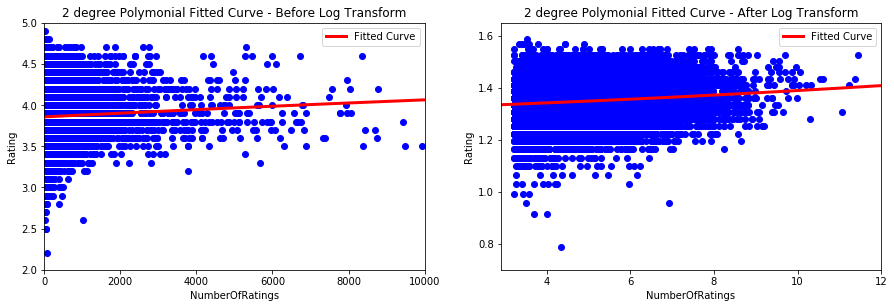

In [145]:
# Let's define a function for plotting scatters with polynomial fitted curves
def ratingvsnumber_polycurves(degree):
    x = np.linspace(1,95000,95000)
    poly_beforelog = np.polyfit(wine_data['NumberOfRatings'], wine_data['Rating'],degree)
    polyfunc_beforelog = np.poly1d(poly_beforelog)
    poly_afterlog = np.polyfit(wine_log['NumberOfRatings'], wine_log['Rating'],degree)
    polyfunc_afterlog = np.poly1d(poly_afterlog)

    poly_1 = polyfunc_beforelog[0] + polyfunc_beforelog[1]*(x) + polyfunc_beforelog[2]*(x**2)\
    + polyfunc_beforelog[3]*(x**3) + polyfunc_beforelog[4]*(x**4) + polyfunc_beforelog[5]*(x**5) + polyfunc_beforelog[6]*(x**6)\
    + polyfunc_beforelog[7]*(x**7) + polyfunc_beforelog[8]*(x**8)

    poly_2 = polyfunc_afterlog[0] + polyfunc_afterlog[1]*(x) + polyfunc_afterlog[2]*(x**2) + polyfunc_afterlog[3]*(x**3)\
    + polyfunc_afterlog[4]*(x**4) + polyfunc_afterlog[5]*(x**5) + polyfunc_afterlog[6]*(x**6) + polyfunc_afterlog[7]*(x**7)\
    + polyfunc_afterlog[8]*(x**8)

    curve_plots(x=x, y_beforelog=poly_1, y_afterlog=poly_2, original_dataset=wine_data, log_dataset=wine_log,\
                attribute_x='NumberOfRatings', attribute_y='Rating', xlim_1=0, xlim_2=10000, ylim_1=2, ylim_2=5,
                xlimlog_1=2.9, xlimlog_2=12, ylimlog_1=0.7, ylimlog_2=1.65,\
                title_1 = '{} degree Polymonial Fitted Curve - Before Log Transform'.format(degree),
                title_2 = '{} degree Polymonial Fitted Curve - After Log Transform'.format(degree))

# 2nd degree
ratingvsnumber_polycurves(2)

Rating VS NumberOfRatings - Scatter Plots with Fitted Curves


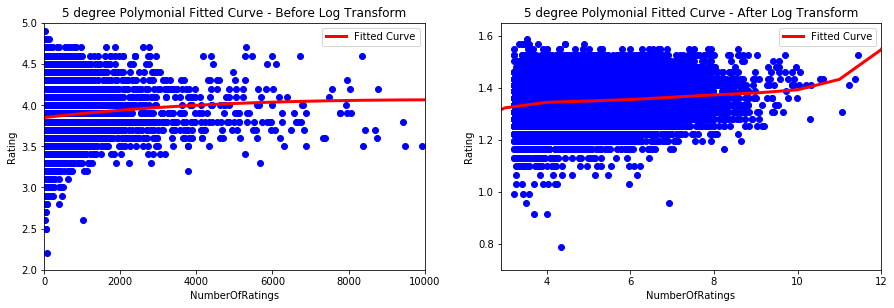

In [146]:
# 3rd degree
ratingvsnumber_polycurves(5)

No relationships, either logarithimc or polynomial, have been found between the variables.

##### Price as a function of Number_of_Ratings

Let's explore possible relationships between Price and the number of Ratings, and, if any, how the Number of Ratings affect the Price. 

Price VS NumberOfRatings - Scatter Plots


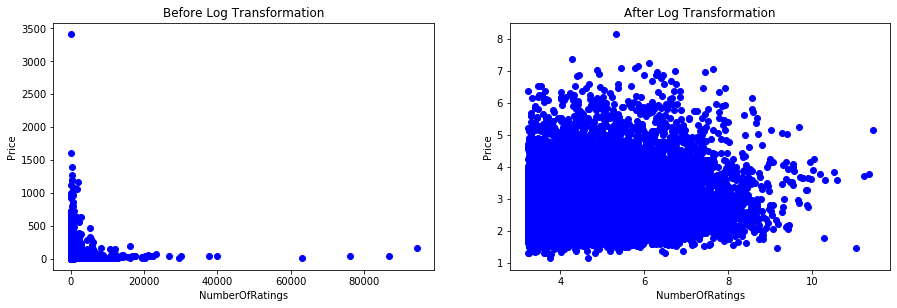

In [147]:
scatter_plots(wine_data, wine_log, 'NumberOfRatings','Price')

Price VS NumberOfRatings - Scatter Plots


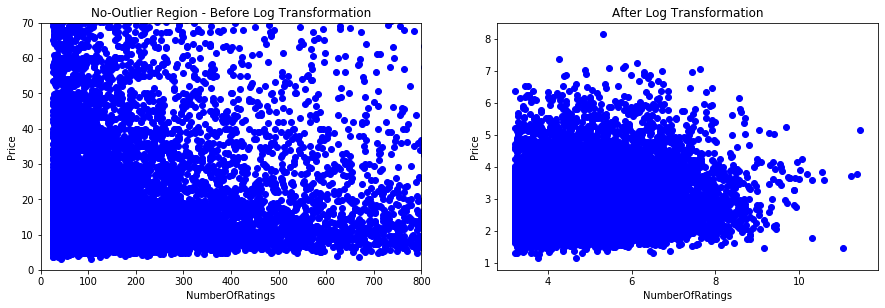

In [148]:
scatter_plots(wine_data, wine_log, 'NumberOfRatings','Price', xlim_1=0, xlim_2=800, ylim_1=0, ylim_2=70,
             title_1='No-Outlier Region - Before Log Transformation')

It's quite evident that no relationship exist between the variables, either before or after the Log Transformation.

### 2.4. Feature Engineering & Variable Transformations <a name="featureengineering"></a>

#### 2.4.1. Encoding

In order to get the data ready for potential modeling, we have to convert the categorical features into numeric types. Let's have a look at the object-type attributes.

In [149]:
wine_data.select_dtypes('object').columns

Index(['Name', 'Country', 'Region', 'Winery', 'Year', 'Style', 'Unique_Name'], dtype='object')

The relevant attributes for the scope of our analysis are:
* Country
* Year
* Style

The categories in the attribute are nominal, therefore I will proceed with a Nominal type of encoding, that is One-Hot encoding.

In [150]:
# Nominal encoding - Country
country = wine_data['Country']
country_encoded = pd.get_dummies(country)
country_encoded

,Argentina,Australia,Austria,Brazil,Bulgaria,Canada,Chile,China,Croatia,Czech Republic,...,Romania,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,United Kingdom,United States,Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
# Nominal encoding - Year
year = wine_data['Year']
year_encoded = pd.get_dummies(year)
year_encoded

,1961,1988,1989,1990,1991,1992,1993,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,N.V.
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [152]:
# Nominal encoding - Style
style = wine_data['Style']
style_encoded = pd.get_dummies(style)
style_encoded

,red,rose,sparkling,white
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
13827,0,0,1,0
13828,0,0,1,0
13829,0,0,1,0
13830,0,0,1,0


In our analysis, we have observed that grouping the Year categories into Time-periods returns the highest impact in explaining the Rating and Price variables. I'll encode those variables as well with one-hot encoding, for future potential modeling.

In [153]:
# Nominal encoding - time_periods
time_periods = copy_1_winedata['Year']
timeperiods_encoded = pd.get_dummies(time_periods)
timeperiods_encoded

,00s years,10s years,pre-2000 years and N.V.
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
13827,0,0,1
13828,0,0,1
13829,0,0,1
13830,0,0,1


#### 2.4.2. Feature Scaling

As observed, Log-Transformation turned the data distribution into more "normal" curve, and strengthened potential relationships, either linear or curvi-linear, between the variables Rating and Price.
Therefore, in order to build a dataset with features ready for potential modeling, I'll select the relevant features, log transformed, and apply feature scaling.

In [154]:
wine_data.columns

Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year', 'Style', 'Unique_Name'],
      dtype='object')

Based on our analysis, Rating and Price are correlated variables (either linearly or curvi-linearly) and the Time-period variable is  the most impactful attribute in relation to Rating and Price. Therefore, my feature selection will include:
* Rating (to be used as the Target in a Rating-predicting model)
* Price (to be used as the Target in a Price-predicting model)
* Time Periods

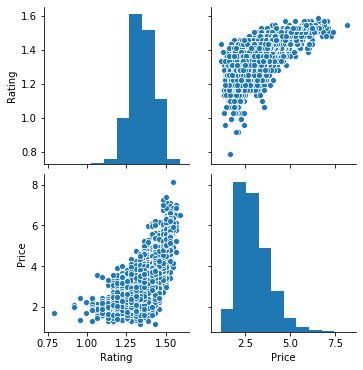

In [155]:
features = pd.concat([wine_log[['Rating','Price']], timeperiods_encoded], axis=1)
sns.pairplot(features[['Rating','Price']])

In [156]:
print('Features skeweness score:')
features[['Rating','Price']].skew()

Features skeweness score:


Rating   -0.265821
Price     1.039141
dtype: float64

Price distribution is still right-skewed, probably due to the presence of some outliers. Therefore, I'll use Robust Scaler, as scaling approach, in order to minimize the outliers' impact. 

In [157]:
features = RobustScaler().fit(features).transform(features)
features

array([[ 0.72191888,  1.50114416,  0.        ,  0.        ,  0.        ],
       [ 0.95113998, -0.02407561,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.64039824,  0.        ,  0.        ,  0.        ],
       ...,
       [ 0.48717386,  0.78619611,  0.        , -1.        ,  1.        ],
       [ 0.72191888,  0.84596097,  0.        , -1.        ,  1.        ],
       [ 1.60811564,  1.99068646,  0.        , -1.        ,  1.        ]])

## 3. Hypothesis Testing <a name="hypothesistesting"></a>

1. **Question:** Moldova wines have the highest average rating score, that is 4.175 (VS 3.87 population average rating). Is the difference between Moldova's wine average rating and the population average rating statistically significant?  
**Null hypothesis (H0):** The difference is not significant, but just due to random chance or natural variability of the data.  
Moldova wines' average rating score = 3.87.  
**Alternative hypothesis (H1):** The difference is statistically significant. Moldova wines have actually a higher average rating score than the population average (and they should deserve more worldwide recognition).  
Moldova wines' average rating score > 3.87.

2. **Question:** 1989-1993 wines have an average price of 794 euros, VS a population average price of 33 euros per wine. Is the difference between 1989-1993 average wine price and population average price statistically significant (or due to chance)?  
**Null hypothesis (H0):** The difference is not significant, but just due to random chance or natural variability of the data.  
1989-1993 wines' average price = 33.03 euros.  
**Alternative hypothesis (H1):** The difference is statistically significant. 1989-1993 wines have actually a higher average price than the population average.  
1989-1993 wines' average price > 33.03 euros.

3. **Question:** Gaja winery, Italy (the 5th winery per number of wines), is the winery, amongst the top 10, with the highest average rating (4.37 VS 3.87 (population average)) and highest average price (197.15 euro VS 33.03 euro (population average)). Is the difference between Gaja average rating/price and population average rating/price statistically significant?  
**Null hypothesis (H0):** The difference is not significant, but just due to random chance or natural variability of the data.  
Gaja average rating = 3.87.  
Gaja average price = 33.03 euro.    
**Alternative hypothesis (H1):** The difference is statistically significant. Gaja wines have actually a higher average rating and price than the population average.  
Gaja average rating > 3.87.  
Gaja average price > 33.03 euro.

### 3.1. Significance Test

For the scope of this project we'll conduct a significance test only for the first hypothesis.

1. **Question:** Moldova wines have the highest average rating score, that is 4.175 (VS 3.87 population average rating). Is the difference between Moldova's wine average rating and the population average rating statistically significant?  
**Null hypothesis (H0):** The difference is not significant, but just due to random chance or natural variability of the data.  
Moldova wines' average rating score = 3.87.  
**Alternative hypothesis (H1):** The difference is statistically significant. Moldova wines have actually a higher average rating score than the population average (and they should deserve more worldwide recognition).  
Moldova wines' average rating score > 3.87.

To conduct a Significance Test, we'll follow a Frequentist approach, that is we want to obtain a decision boundary to decide whether we accept or reject the Null Hypothesis (H0).  
First, let's check the size of our sample.

In [158]:
print('Sample size:',len(wine_data[wine_data['Country'] == 'Moldova']))

Sample size: 16


Since our sample size is **less than 30 observations**, and we know that the Rating variable is **approximately Normally distributed**, the appropriate test statitsic to decide whether we accept or reject the null hypothesis is the **One Sample T-test (Student's t Distribution).**

+ **Test Statistic:** 1-sample t-test (right tailed).  
+ **Significance Level:** 5% (P-Value = 0.05: probability threshold below which the H0 is rejected).  
+ **Confidence Interval:** 95%.  
+ **Rejection Region:** Since we are performing a 1-tailed test (right-tailed), **the t-critical value is 1.753** (source: <a href="https://www.statisticshowto.com/tables/t-distribution-table/">T-Distribution Table</a>.). T-scores higher than 1.753 will lead to the rejection of H0 (probability of the test statistic values of happening (P-Value) < than Significance Level).  
+ **Acceptance Region:** T-scores lower than 1.753 (probability of the test statistic values of happening (P-Value) >= than Significance Level).

<function matplotlib.pyplot.show(*args, **kw)>

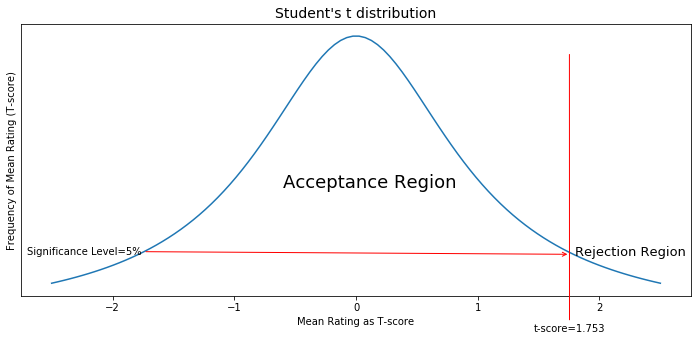

In [159]:
# let's plot the Student's T distribution
x=np.linspace(-2.5,2.5,100)
plt.figure(figsize=(12,5))
plt.plot(x, stats.t.pdf(x, 1))
plt.title("Student's t distribution", fontsize=14)
plt.xlabel('Mean Rating as T-score')
plt.ylabel('Frequency of Mean Rating (T-score)')
plt.yticks(ticks=[])
plt.annotate('Significance Level=5%', xy=(1.753,0.076), xytext=(-2.7,0.076), xycoords='data',\
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=1))
plt.annotate('t-score=1.753', xy=(1.753,0.3), xytext=(1.46,-0.01), xycoords='data',\
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=1))
plt.annotate('Acceptance Region', xy=(-0.6, 0.15), fontsize=18)
plt.annotate('Rejection Region', xy=(1.8, 0.075), fontsize=13)
plt.show

In [160]:
# Let's calculate the t-score
sample_mean = wine_data[wine_data['Country'] == 'Moldova']['Rating'].mean()
population_mean = wine_data['Rating'].mean()
sample_std = wine_data[wine_data['Country'] == 'Moldova']['Rating'].std()
sample_size = len(wine_data[wine_data['Country'] == 'Moldova'])
t_criticalvalue = 1.753
t_score, p_value = stats.ttest_1samp(wine_data[wine_data['Country'] == 'Moldova']['Rating'], population_mean)

print('T-score:', round(t_score,2))
print("Probability of sample's mean rating to happen: {}%.".format(round(p_value*100,4)))
if t_score <= t_criticalvalue:
    print('Null hypothesis (Ho) is not rejected')
else:
    print('Null hypothesis (Ho) is rejected')

T-score: 6.35
Probability of sample's mean rating to happen: 0.0013%.
Null hypothesis (Ho) is rejected


The obtained t-score is greater than our t-critical value (6.35 > 1.753), that means that **we can consider the difference between the Moldova's wine mean rating and the population mean rating** as statistically significant; in other words, we can say that Moldova's mean rating had less than 5% of probability to happen (actually only 0.0013%), so we cannot consider it as just due to random chance.  
Therefore, **we can reject the null-hypothesis, with a confidence level of 95%, and state that Moldova wines' mean rating is greater than 3.88 (the population rating).**

## 4. Discussion <a name="discussion"></a>

1. **Outlier policy.** In performing this analysis, I decided not to remove or transform the outliers. In variables like Price and Number-of-Ratings, the outliers are, approximately, 10% of the data. Since outliers are rare by definition, I didn't reckon the idea of removing the outliers as a legitimate choice, in this particular case. In the absence of a specific reason to delete the outliers (like if the outliers had been errors in the dataset), I considered the outliers as part of the natural distribution of data. This has, obviously, increased the data variability, although I managed to reach interesting insights despite of the presence of outliers. I just want to point out that, instead of removing or transforming the outliers, I dealt with them in 2 ways:
 * Applying a logarithmic transformation on the data. The transformation made the data distribution more normal, and strengthened the correlation between the variables.
 * While visually inspecting potential relationships between the variables, I focused on the "non-outlier" region, in order to not let the analysis be biased by extreme outliers.  


2. **Variable Correlations.** Relationship between the variables Rating and Price can be either linear (after log transform), or curvilinear:
 * Price could be used as explanatory variable for Rating, using a logarithmic regression.
 * The curvilinear relationship between Price (as explanatory variable) and Rating (as target) could be either exponential or polynomial (degree: 2 - 6).  
 

3. **Hypothesis Testing.** Regarding the significance test on the first hypothesis about wines from Moldova, the outcome is quite surprising: I, myself, a wine enthusiast and never heard about Moldova wines. The test’s result is, anyway, unequivocal: my next wine purchase will definitely be a bottle from Moldova!  


4. **Geospatial analysis.** It would be extremely interesting creating a Choropleth Map of the Wine Regions; for this purpose, a file (ideally either a geojson or topojson file) with regions’ coordinates is needed.  


5. **Further analyses.** Attributes such as Region and Winery are of no real value as explanatory variables for targets like Rating and Price. Although it might be interesting to analyze the attributes’ relationships and impact in ad hoc single-country analyses.

## 5. Conclusion <a name="conclusion"></a>

In this project I've analyzed a dataset about wine, from <a href=https://www.vivino.com/>Vivino.com.</a> The dataset was updated, and quality of data was pretty good, with neither missing values nor, basically, duplicates. I've adopted a descriptive approach, to analyze data current status, find insights, and uncover relationships between variables.  
During the Data Cleaning stage, I analyzed data distribution, performed outlier and frequency distribution (for categorical variables) analysis.  

The Exploratory Data Analysis is made of 2 parts:
* Descriptive Statistics.
* Data Mining.  

**Descriptive Statistics:** in this part I analyzed the data overall current status, discussing general data information, such as: top producing country stats, country ranking (rating and price), year distribution, product price, style breakdown, supplier analysis...  
**Data Mining:** uncovering correlations, patterns, and relationships between variables. Considering both Rating and Price as target variables, I analyzed the impact of the other attributes, categorical as well as numerical, using a variety of techniques: category boxplots, Analysis of Variance (ANOVA), scatter plots, logarithmic transformations, linear and curvi-linear regressions, Pearson Correlation Coefficients...  

Results are as follows:
* The most impactful categorical variable over the targets (both Rating and Price) was the Year attribute; value categorization in time-periods ("pre-2000 years and N.V.", "00s years", "10s years") proved to be most significant variable transformation. Country and Style explanatory value, over the targets, is not significant.
* Rating and Price, after a logarithmic transformation, showed a linear tendency (Pearson Correlation > 0.7); that means that one variable can be used to explain/predict the other, using a linear regression model.
* A logarithmic regression model could be used to explain/predict Rating, using Price as the independent variable.
* An exponential regression model could be used to explain/predict Price, using Rating as the independent variable.
* Polynomial regressions could be used to explain/predict Price, using Rating as the independent variable (degrees from 3 to 6 seem to work better).
* The Number-of-Ratings variable doesn't seem to have any impact, or explanatory value, over the target variables. 

**Recommended next steps.** Data is already transformed (using one-hot type of encoding and robust scaling approach) and ready for model development and testing. Following tests should be conducted to find the best regression model:
* Linear or curvilinear (logarithmic, exponential, polynomial) regressions
* After or before Logarithmic transformation
* With or without Time-period variable.

The performed analysis proved to be very useful to understand the current status of data, and it's a robust initial exploration to further develop parametric machine learning models.